# Problem Statement
- The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
- Build a model to accurately predict whether the patients in the dataset have diabetes or not.
Dataset Description

# Dataset Description
The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

 
- **Pregnancies:**	Number of times pregnant
- **Glucose:**	Plasma glucose concentration in an oral glucose tolerance test
- **BloodPressure:**	Diastolic blood pressure (mm Hg)
- **SkinThickness:**	Triceps skinfold thickness (mm)
- **Insulin:**	Two hour serum insulin
- **BMI:**	Body Mass Index
- **DiabetesPedigreeFunction:**	Diabetes pedigree function
- **Age:**	Age in years
- **Outcome:**	Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0

# Tasks:
## Data Exploration:
1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:
  - Glucose
  - BloodPressure
  - SkinThickness
  - Insulin
  - BMI
2. Visually explore these variables using histograms. Treat the missing values accordingly.
3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

## Data Exploration:

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.
2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.
3. Perform correlation analysis. Visually explore it using a heat map.

## Data Modeling:
1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.
2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.
3. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

## Data Reporting:
Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:
  - Pie chart to describe the diabetic or non-diabetic population
  - Scatter charts between relevant variables to analyze the relationships
  - Histogram or frequency charts to analyze the distribution of the data
  - Heatmap of correlation analysis among the relevant variables
  - Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

 

# Importing required Libraries

In [3]:
!pip install optuna

In [5]:
pip install statsmodels

  Using cached statsmodels-0.13.2-cp39-cp39-win_amd64.whl (9.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import itertools

from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

from sklearn.model_selection import train_test_split, StratifiedKFold

import statsmodels.api as sm

import optuna
from sklearn import preprocessing
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              ExtraTreesClassifier, BaggingClassifier,
                              GradientBoostingClassifier, GradientBoostingClassifier)
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.combine import SMOTETomek
from sklearn.ensemble import VotingClassifier


import warnings
warnings.filterwarnings('ignore')

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Loading and reading data

In [7]:
df = pd.read_csv("D:\Downloads\diabetes.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# Checking information of Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


 # Data description

In [9]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

## Observations
- There are no missing value as such but as instructed in the tasks, we have value = 0 for some variable where 0 is not possible, hence we will consider them as missing values and impute them in further steps. Columns that cannot have 0 as their value (and include 0): **Glucose, BloodPressure, SkinThickness, Insulin, BMI**

- We have only integer and float type of data types. Out of which **BMI** and **DiabetesPedigreeFunction** are continuous and rest are discrete variables.



# Marking NaN

In [10]:
na_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[na_cols] =df[na_cols].apply(lambda x: x.replace(0, np.nan))
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# Missing Values Analysis

In [11]:
((df.isnull().sum() / df.shape[0])*100).to_frame().rename({0: 'Missing Values percentage'}, axis = 1).style.background_gradient('gist_heat_r')

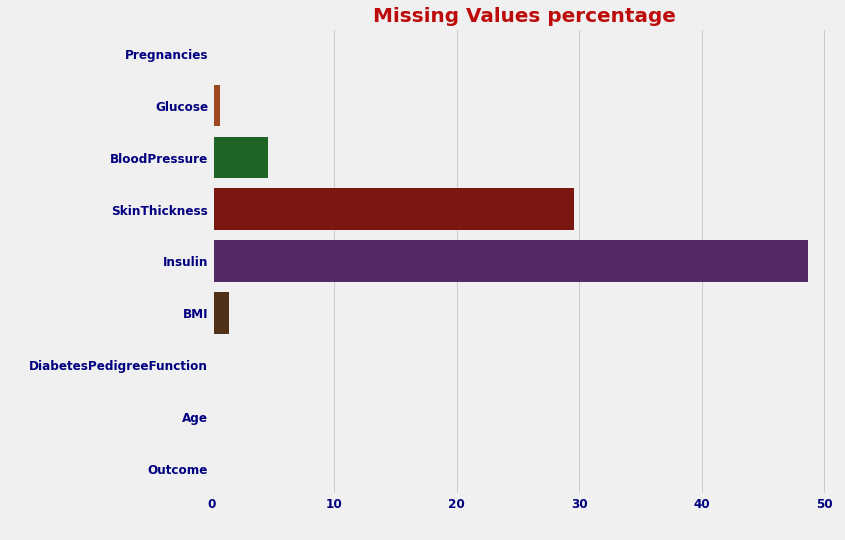

In [12]:
missing_val_df = ((df.isnull().sum() / df.shape[0])*100).to_frame().reset_index().rename({'index': 'columns', 0: 'Missing Values percentage'}, axis = 1)

plt.figure(figsize = (10,8))
sns.barplot(data = missing_val_df, x = 'Missing Values percentage', y = 'columns',palette='dark')
plt.title('Missing Values percentage', fontsize = 20, fontweight = 'bold', color = '#bd0b0b')
plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks(fontsize = 12, fontweight = 'bold', color = 'navy')
plt.yticks(fontsize = 12, fontweight = 'bold', color = 'navy');


## Observations
- Insulin has highest missing value percentage (48.7) 
- SkinThickness and BloodPressure has 29.56 and 4.56 % missing values respectively.
- BMI and Glucose has 1.43 and 0.65 % missing values respectively. 

### Strategy to Impute Missing Values:
- Since **Glucose, BloodPressure, SkinThickness, Insulin, BMI** in given data are continuous numerical numbers. We will usescikit-learn **Iterative imputer** to impute the missing values.



# Missing Value Imputation
## Split the Data

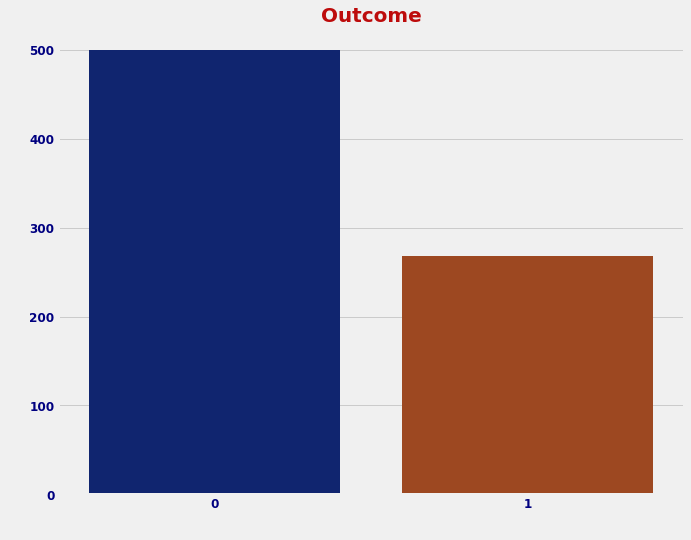

In [13]:
plt.figure(figsize = (10,8))
sns.countplot(data = df, x = 'Outcome', palette='dark')
plt.title('Outcome', fontsize = 20, fontweight = 'bold', color = '#bd0b0b')
plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks(fontsize = 12, fontweight = 'bold', color = 'navy')
plt.yticks(fontsize = 12, fontweight = 'bold', color = 'navy');


In [14]:
"""Imputing BMI using Iterative Imputer"""
it_imputer = IterativeImputer(max_iter=100)
iterimp = it_imputer.fit_transform(df)

"""Create train test imputed dataframe"""
df_eda = pd.DataFrame(iterimp, columns=df.columns)

In [15]:
df_eda.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Univariate Analysis

In [18]:
for i in ['Pregnancies', 'Age']:
  df_eda[i] = df_eda[i].astype(int)


# Exploratory Data Analysis (EDA)
## Univariate Analysis

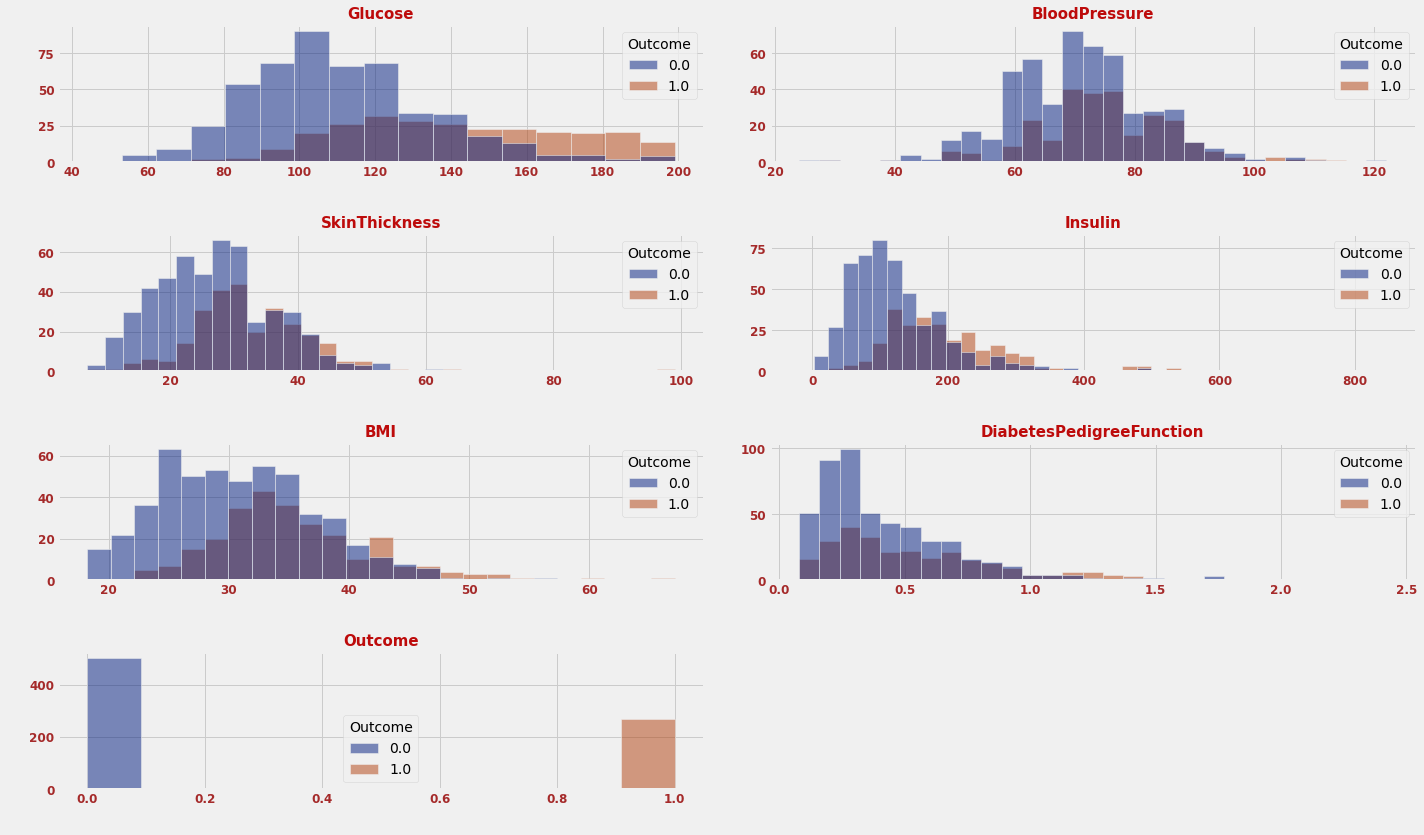

In [19]:
plt.figure(figsize = (20,20))

for i,col in enumerate(df_eda.drop(['Pregnancies', 'Age'], axis = 1)):
  plt.subplot(7,2,i+1)
  sns.histplot(x = col,  data = df_eda, hue = 'Outcome', palette = 'dark' )
  plt.xticks(rotation = 0)
  plt.title(col, fontsize = 15, fontweight = 'bold', color = '#bd0b0b')
  plt.xlabel(" ")
  plt.ylabel(" ")
  plt.xticks(fontsize = 12, fontweight = 'bold', color = 'brown')
  plt.yticks(fontsize = 12, fontweight = 'bold', color = 'brown')
  plt.tight_layout();

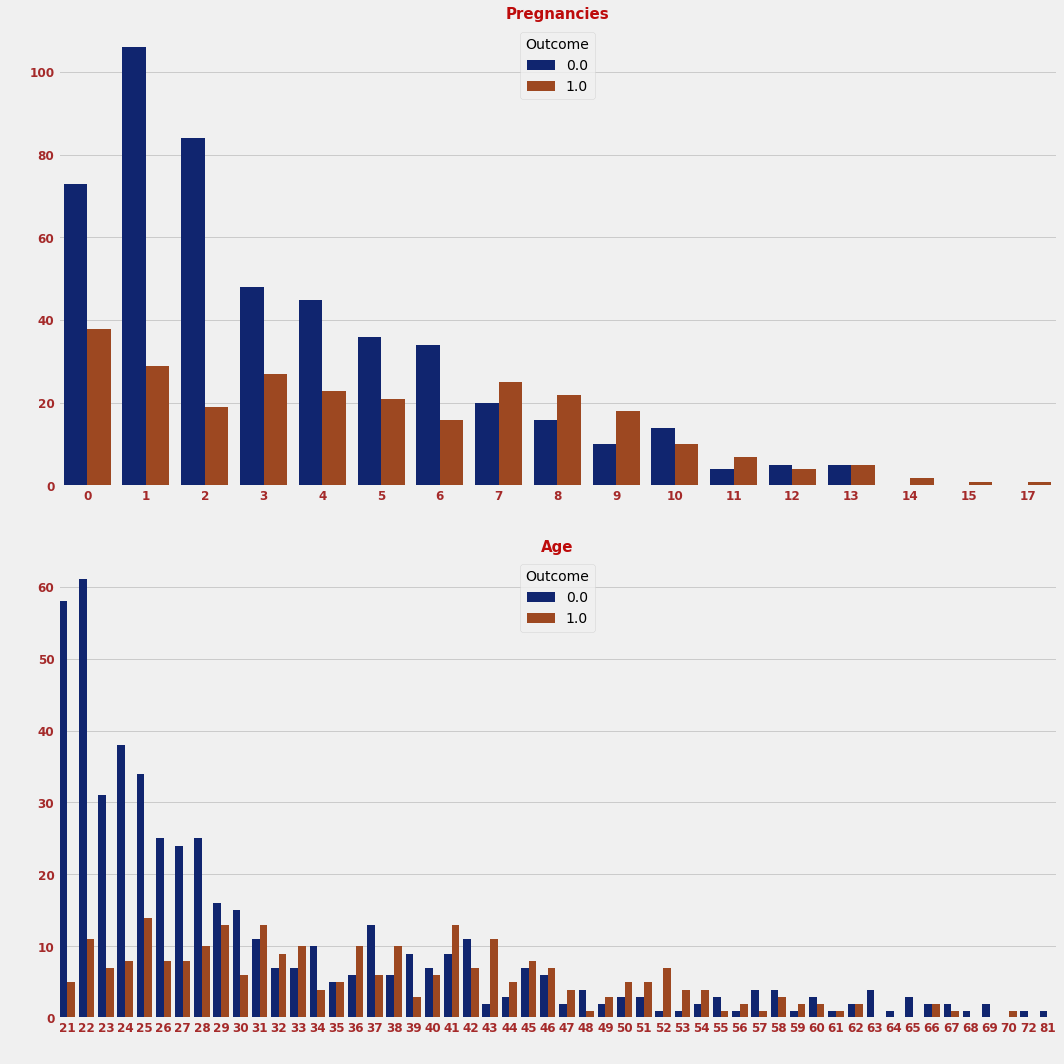

In [20]:
"""Count plots of Pregnencies and Age with hue as Outcome"""
plt.figure(figsize = (15,15))
for i,col in enumerate(['Pregnancies', 'Age']):
  plt.subplot(2,1,i+1)
  sns.countplot(x = col,  data = df_eda, hue = 'Outcome', palette = 'dark' )
  plt.xticks(rotation = 0)
  plt.title(col, fontsize = 15, fontweight = 'bold', color = '#bd0b0b')
  plt.xlabel(" ")
  plt.ylabel(" ")
  plt.xticks(fontsize = 12, fontweight = 'bold', color = 'brown')
  plt.yticks(fontsize = 12, fontweight = 'bold', color = 'brown')
  plt.tight_layout();

## Observations:
- Diabeties are most common in age of 30-35, 44-50 and 55+ as these age groups have more diabetic patient than non-diabetic patient. 
- We cannot infer much from the Pregnancies, but as per data, people with 12 Pregnancies have more diabetic patient than non-diabetic patient.


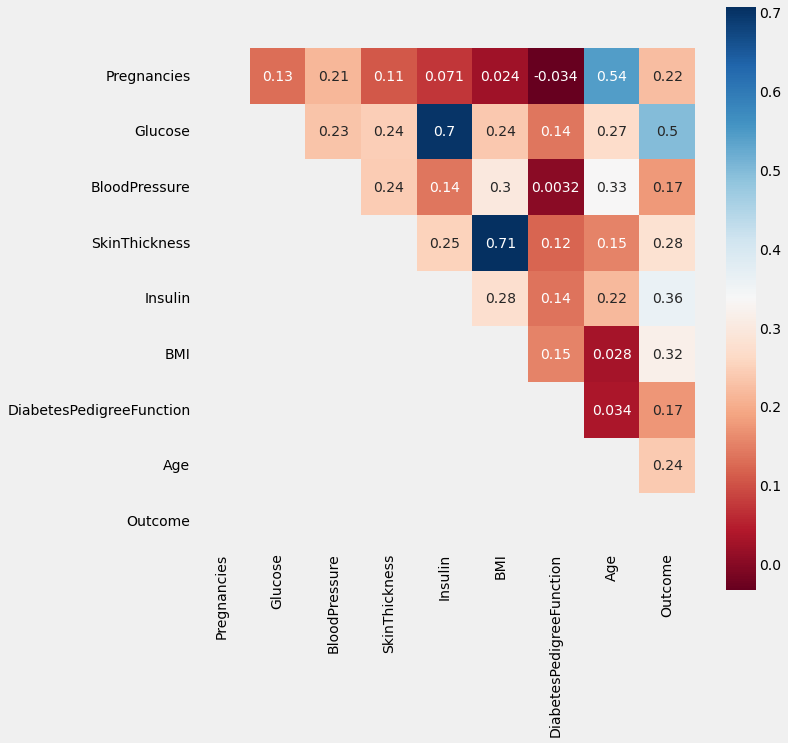

In [21]:
"""Correlation Matrix"""
corr_matrix=df_eda.corr()
 
matrix = np.tril(corr_matrix)

plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix.T, mask=matrix, square=True, cmap = 'RdBu', annot = True);

## Observations:
- A **heatmap** is a two-dimensional representation of information with the help of colors. Heatmaps can **help the user visualize simple or complex information.**
- Outcome (Target Variable) doesn't have much correlation with other variables. 
- Pregnancies and Age are correlated.
- SkinThickness and BMI are highly correlated.
- Glucose and Insulin are highly correlated.

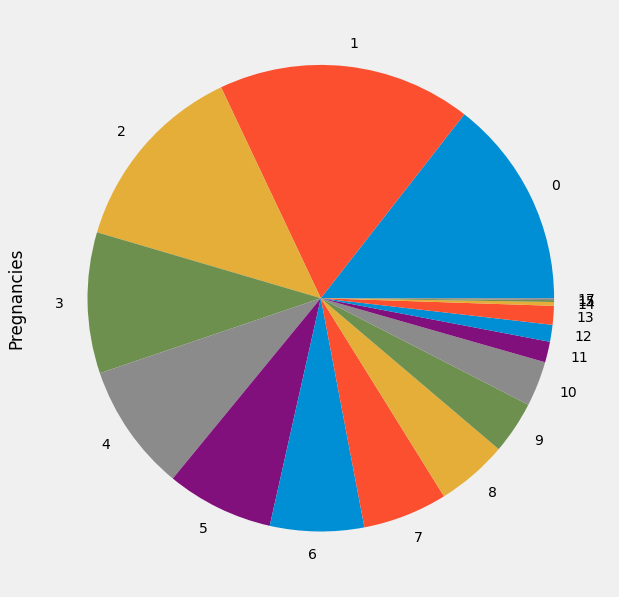

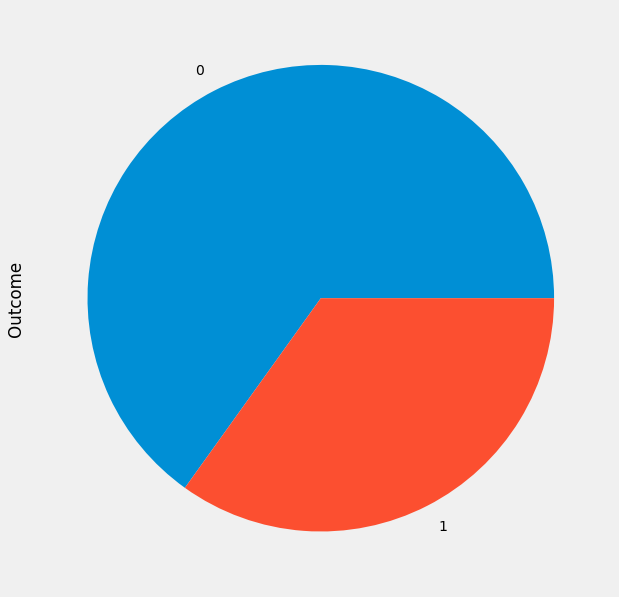

<Figure size 432x288 with 0 Axes>

In [22]:
"""Pie Chart of Pregnencies and Outcome"""
for i in ['Pregnancies', 'Outcome']:
  df.groupby(i)[i].count().plot.pie(y = i, figsize=(10, 10))
  plt.show()
  plt.tight_layout();

# Bi-variate Analysis

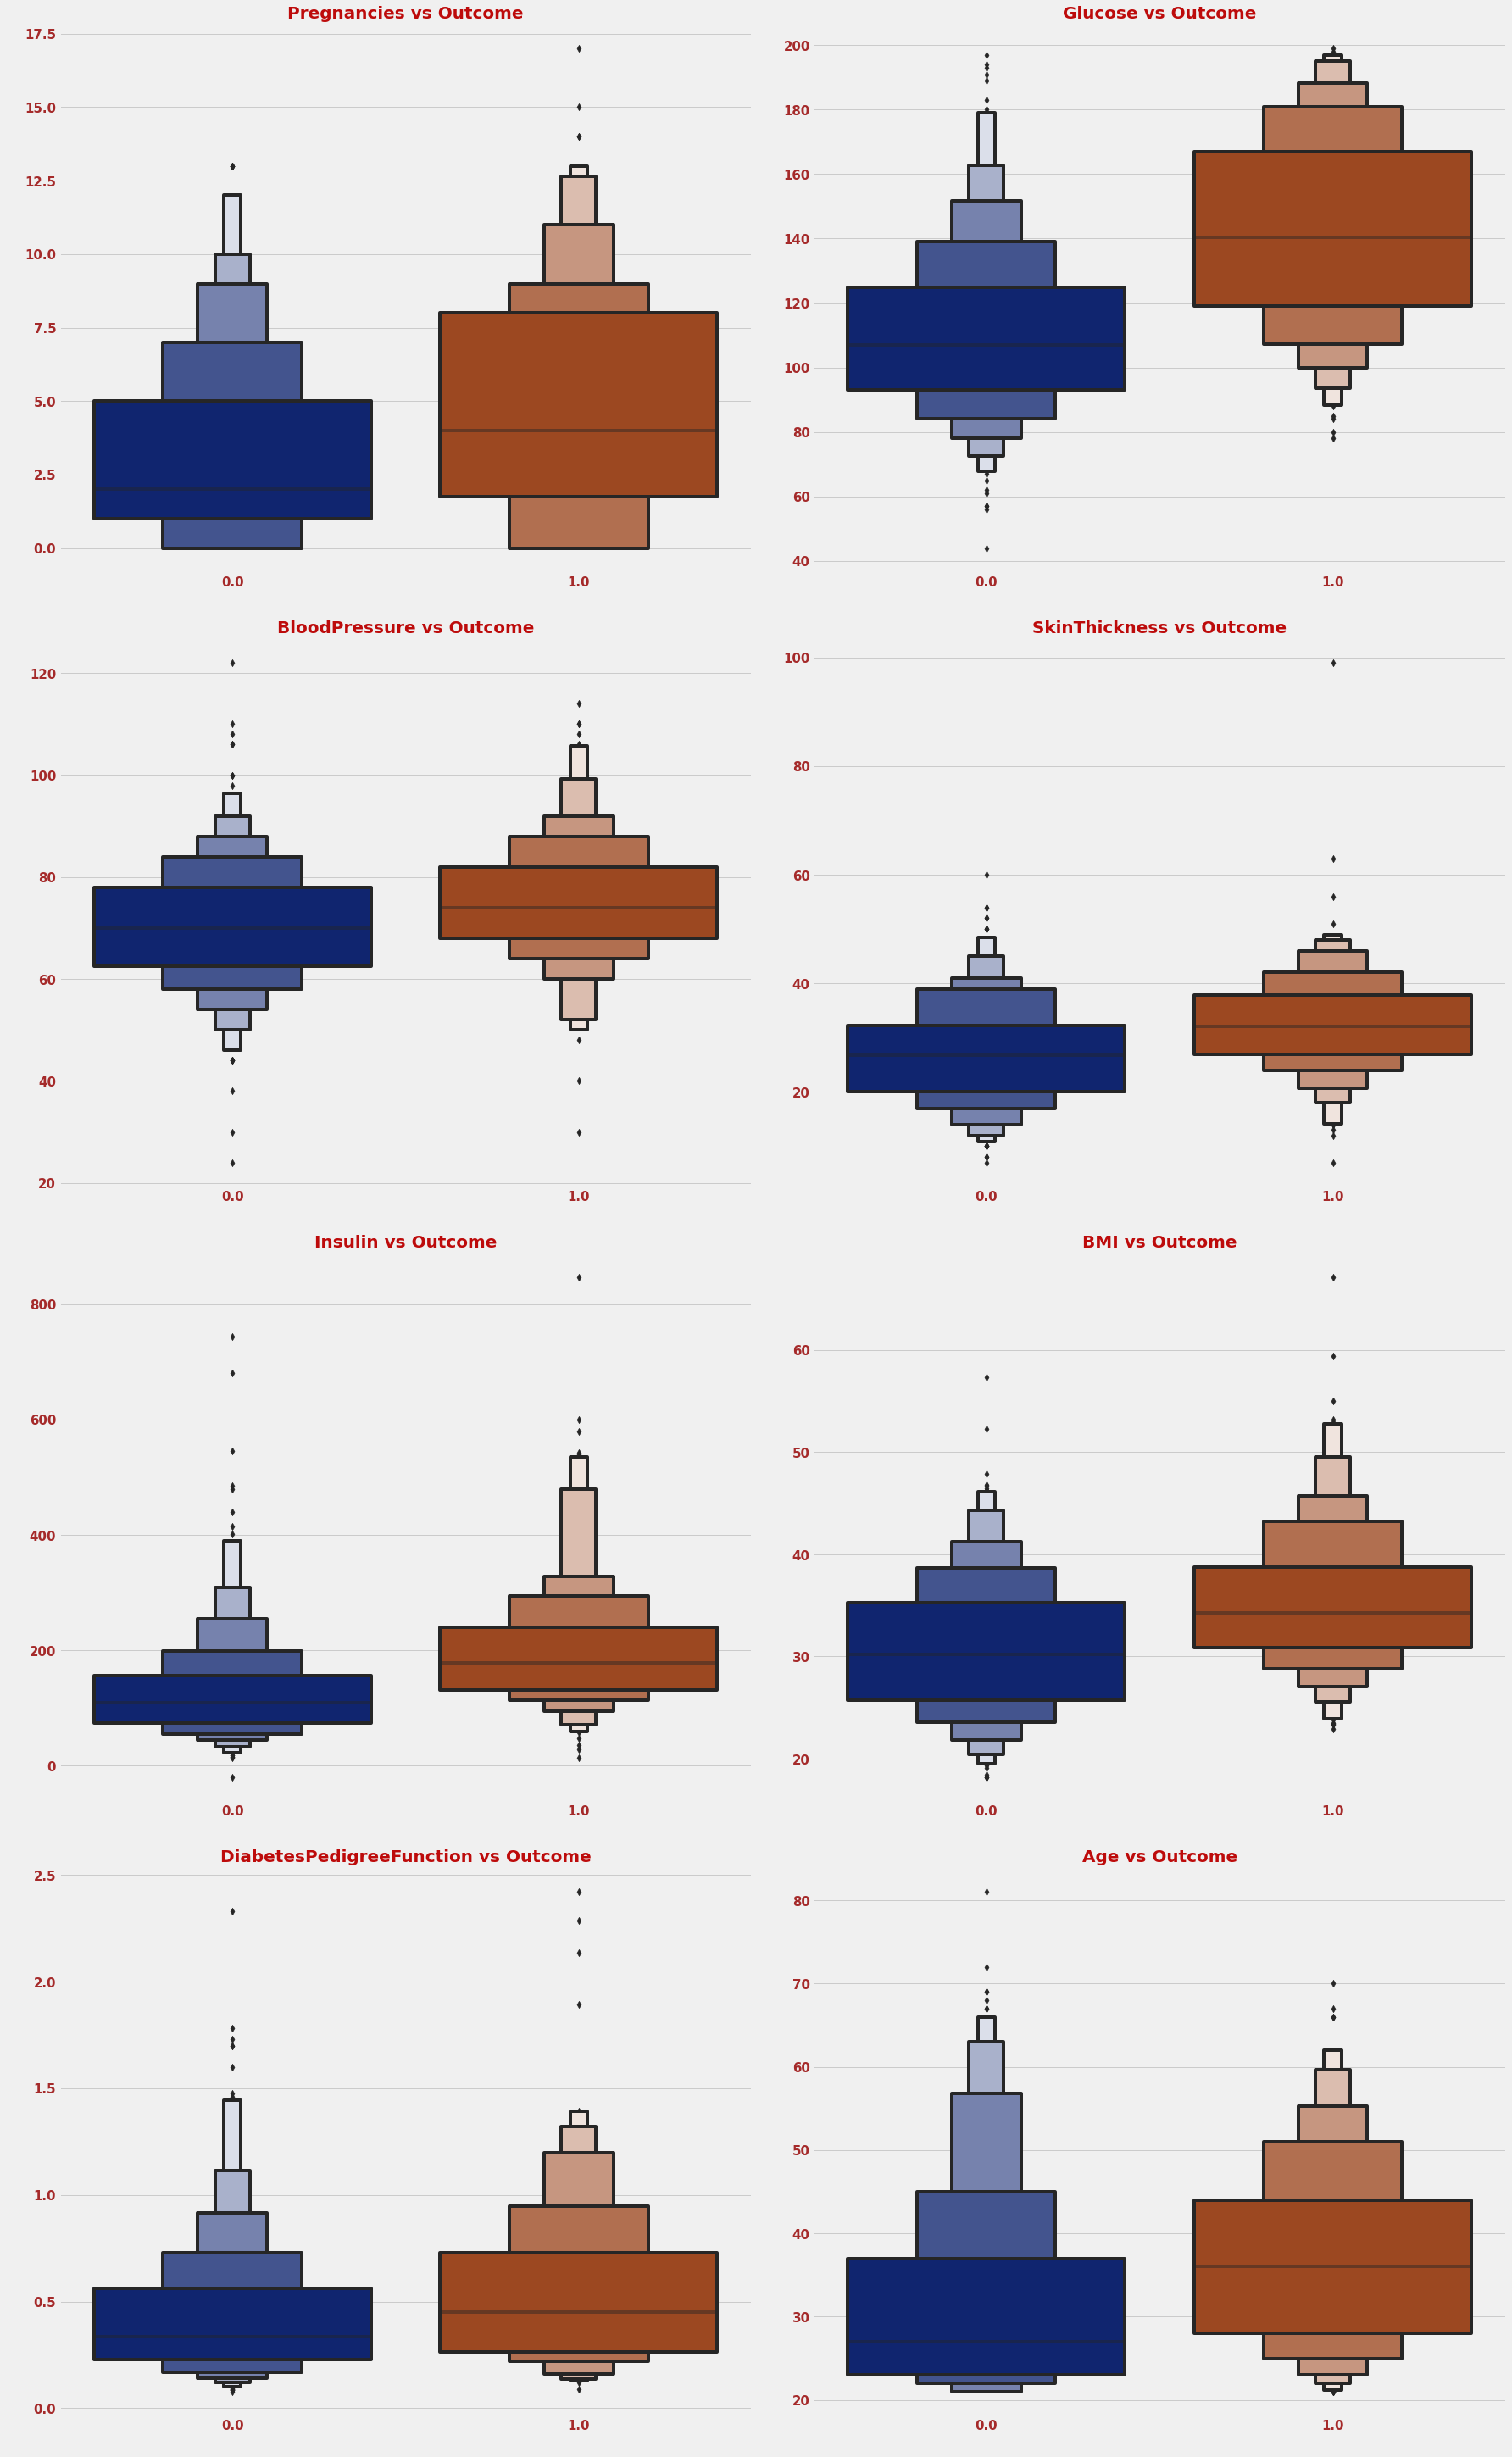

In [23]:
plt.figure(figsize = (25,50))

for i,col in enumerate(df_eda.drop(['Outcome'], axis =1).columns):
  plt.subplot(5,2,i+1)
  sns.boxenplot(x = 'Outcome',y = col,  data = df_eda,palette = 'dark')
  plt.xticks(rotation = 0)
  plt.title(f'{col} vs Outcome', fontsize = 20, fontweight = 'bold', color = '#bd0b0b')
  plt.xlabel(" ")
  plt.ylabel(" ")
  # plt.legend(['No-Purchase', 'Purchase'])
  plt.xticks(fontsize = 15, fontweight = 'bold', color = 'brown')
  plt.yticks(fontsize = 15, fontweight = 'bold', color = 'brown')
  plt.tight_layout();
plt.show()

## **Observations:**
- Above Graphs are **Boxen Plots** of **all features** divided by Target variable (**Outcome**)

### **Pregnencies vs Outcome**
- Pregnent Non diabetic and pregnent diabetic patients have same Median
- Non diabetic have more variance than diabetic patient. 
- Outliers are present in both groups but non-diabetic is more skewed

### **Glucose vs Outcome**
- Non diabetic patient Glucose level have more spread when compared to Diabetic Patient glucose level.
- Both have outliers but Non diabetic patient Glucose level have more spread-out outliers
- Both have same Median, but IQR  of Diabetic patients is little higher than Non-diabetic patients.

### **Blood Pressure vs Outcome**
- Blood Pressure of Diabetic Patients and Non diabetic patients have same median and IQR
- They both have outliers and approximately same spread. 
- Patients who have Diabeties seem to have extreme low blood pressure.

### **SkinThickness vs Outcome**
- SkinThickness of  Diabetic Patients and Non diabetic patients have same median and but IQR of Non-diabetic patients are little higher than diabetic patients. 
- Outliers in both groups but have one  Diabetic Patient seem to have a very high value of SkinThikness.

### **Insuline vs Outcome**
- Insuline value in Non Diabetic patients is has high variance compared to Insulin value in Diabetic Patients.
- Non Diabetic patients has slightly higher insulin median and lower IQR than Diabetic patients
- Outliers are more in non-diabetic patients than in diabetic patients.

### **BMI vs Outcome**
- BMI of non diabetic patients have same median  and slightl higher IQR than diabetic patients 
- Outliers present in both but non-diabetic patients have more extreme outliers. 

### **DiabetesPedigreeFunction vs Outcome**
- DiabetesPedigreeFunction in non-diabetic patients are almost similar interms of median and IQR
- Outliers are present in both but non-diabetic patients have more outliers and variance.

### **Age vs Outcome**
- Age of Diabetic patients has higher median.
- Diabetic patients age has more outliers, higher IQR and variance which shows that diabeties is observed in both young and old people. 


# Outlier Treatment
- Using Capping and Flooring method to replace outliers

In [24]:
"""Creating a list of Outliers columns"""
outliers_cols = []
for col in df_eda.drop(['Outcome'], axis = 1).columns:
  q25, q75 = np.percentile(df_eda[col], 25), np.percentile(df_eda[col], 75)
  iqr = q75 - q25
  outlier_th = iqr*1.5
  lower_th = q25 - outlier_th
  upper_th = q75 - outlier_th 
  if any(df_eda[col].values < lower_th) or any(df_eda[col].values > upper_th):
    outliers_cols.append(col)

print(outliers_cols)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [25]:
"""Treating Outliers"""
for col in outliers_cols:
  percentiles = df_eda[col].quantile([0.01, 0.99]).values
  df_eda[col] = np.clip(df_eda[col], percentiles[0], percentiles[1])

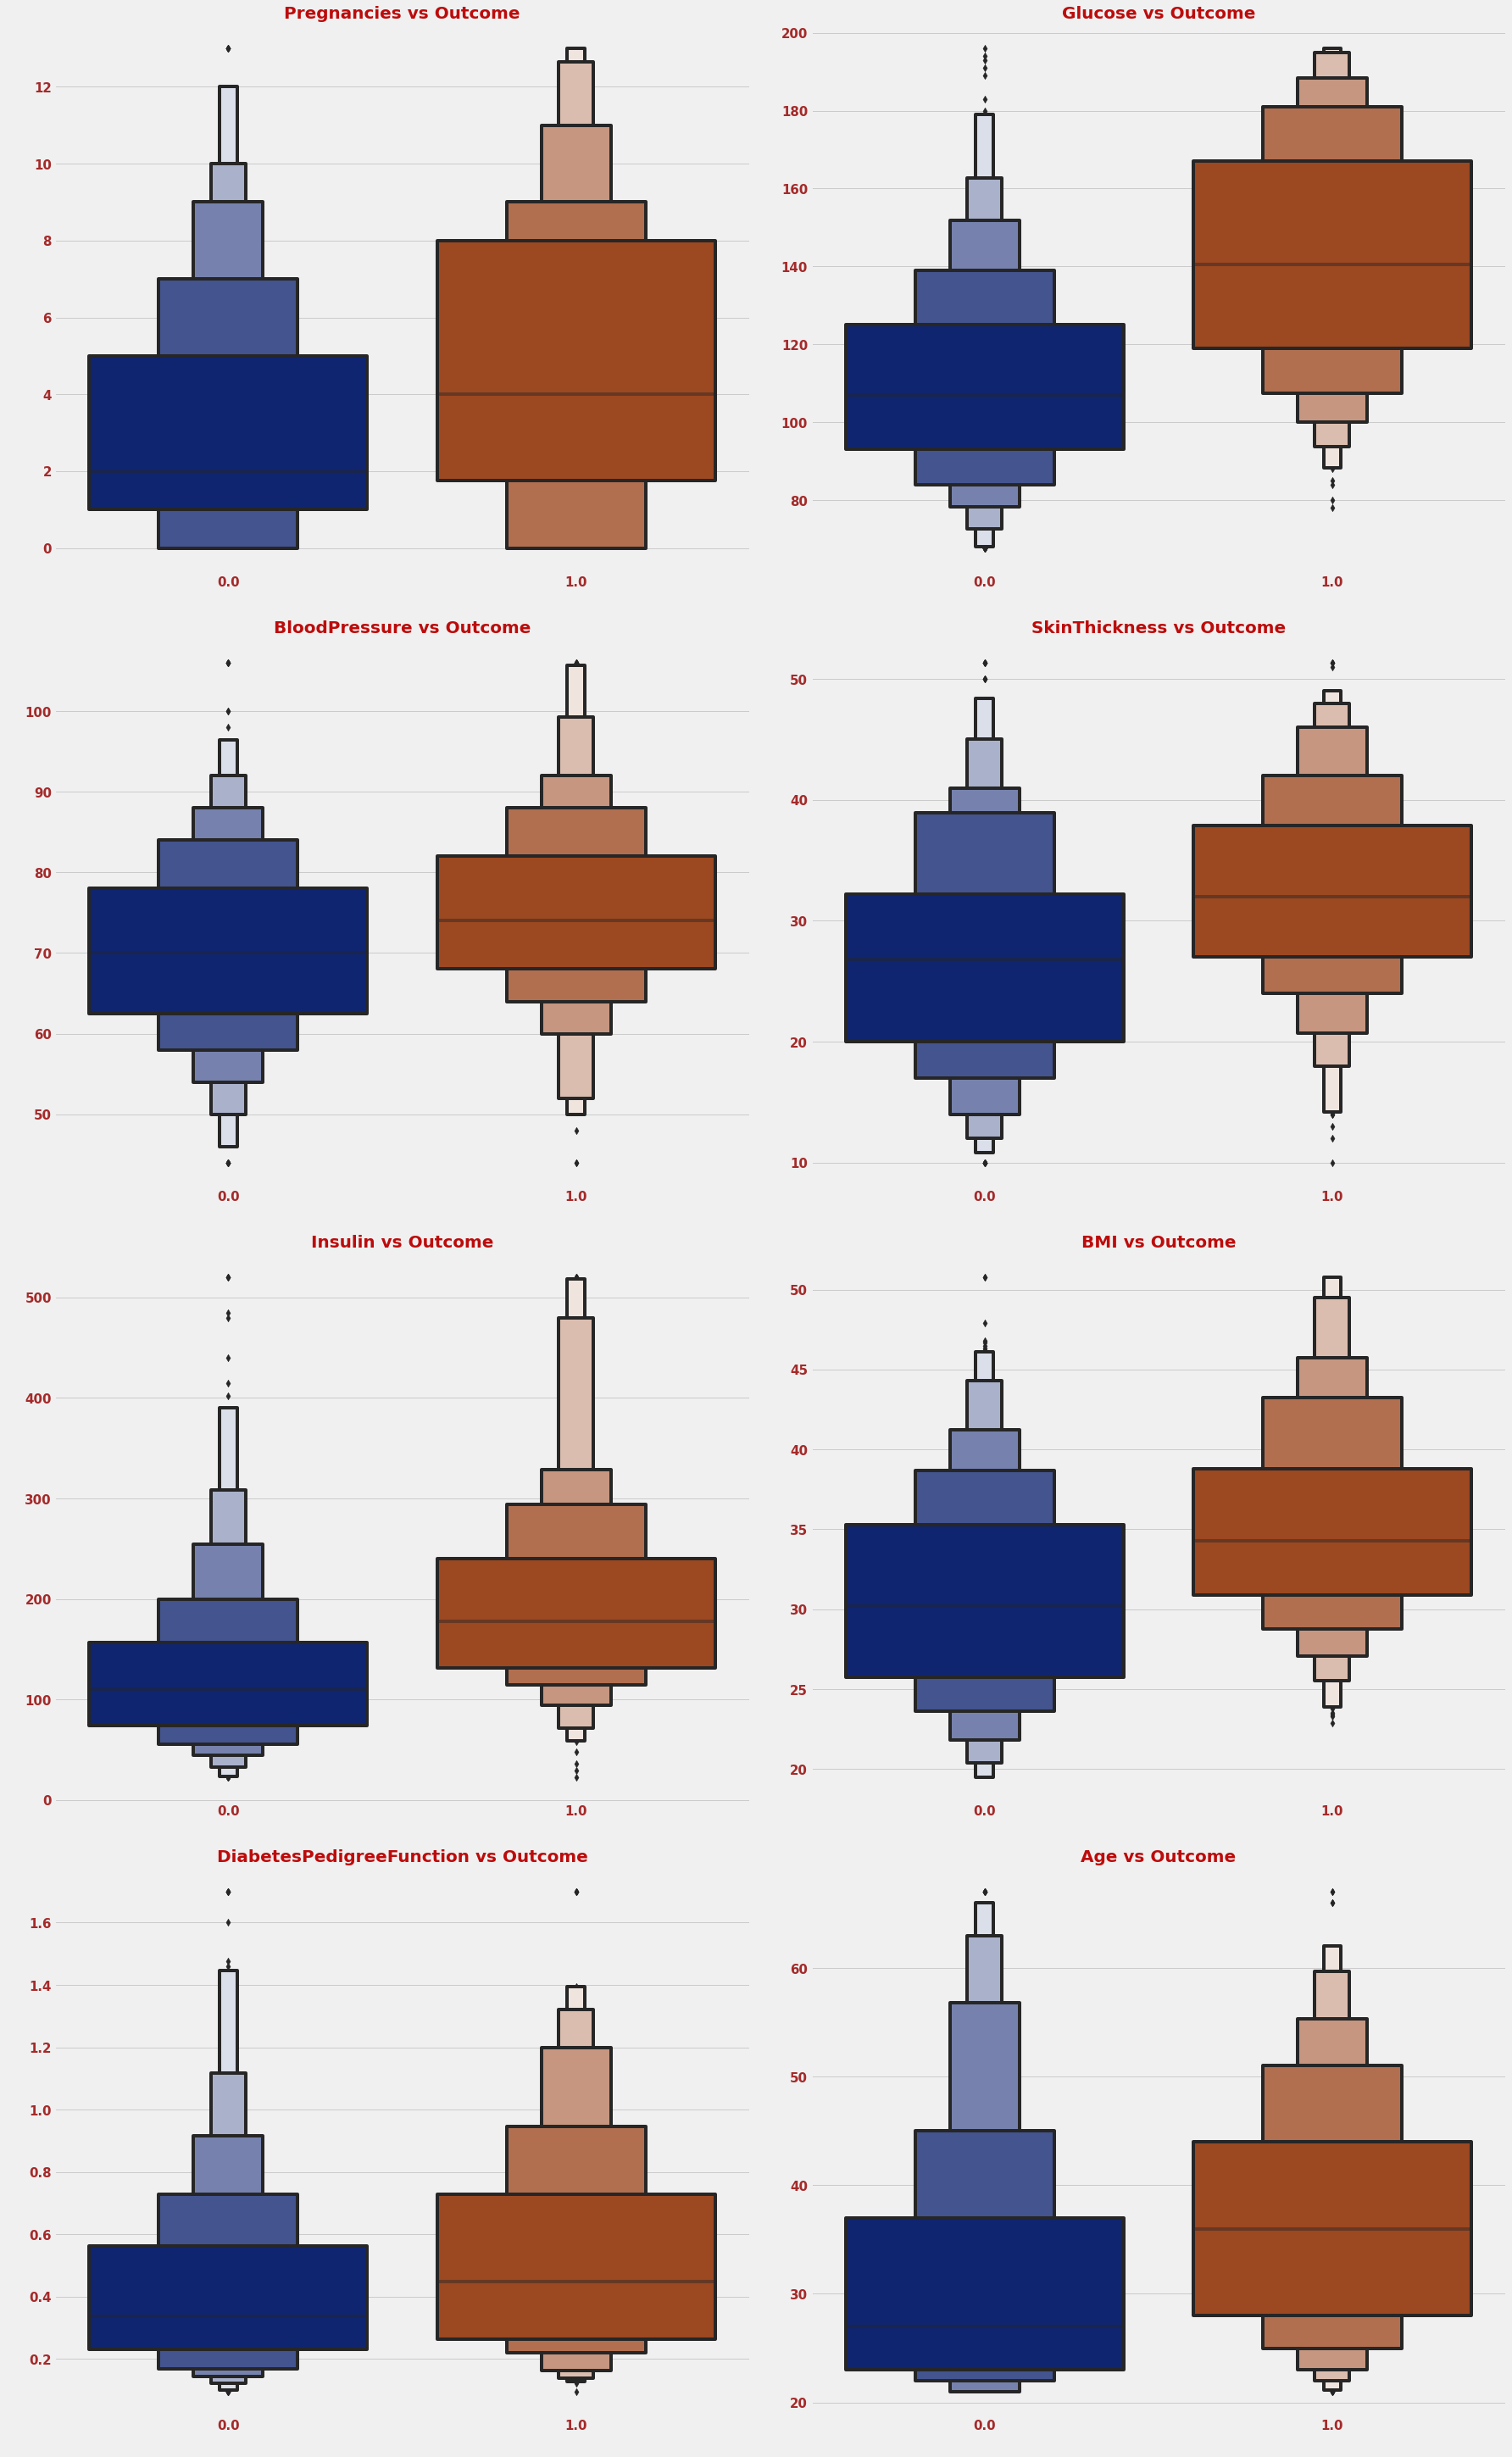

In [26]:
"""Checking the distribution using Boxen plots after capping and flooring Outliers"""
plt.figure(figsize = (25,50))

for i,col in enumerate(df_eda.drop([ 'Outcome'], axis =1).columns):
  plt.subplot(5,2,i+1)
  sns.boxenplot(x = 'Outcome',y = col,  data = df_eda,palette = 'dark')
  plt.xticks(rotation = 0)
  plt.title(f'{col} vs Outcome', fontsize = 20, fontweight = 'bold', color = '#bd0b0b')
  plt.xlabel(" ")
  plt.ylabel(" ")
  # plt.legend(['No-Purchase', 'Purchase'])
  plt.xticks(fontsize = 15, fontweight = 'bold', color = 'brown')
  plt.yticks(fontsize = 15, fontweight = 'bold', color = 'brown')
  plt.tight_layout();
plt.show()

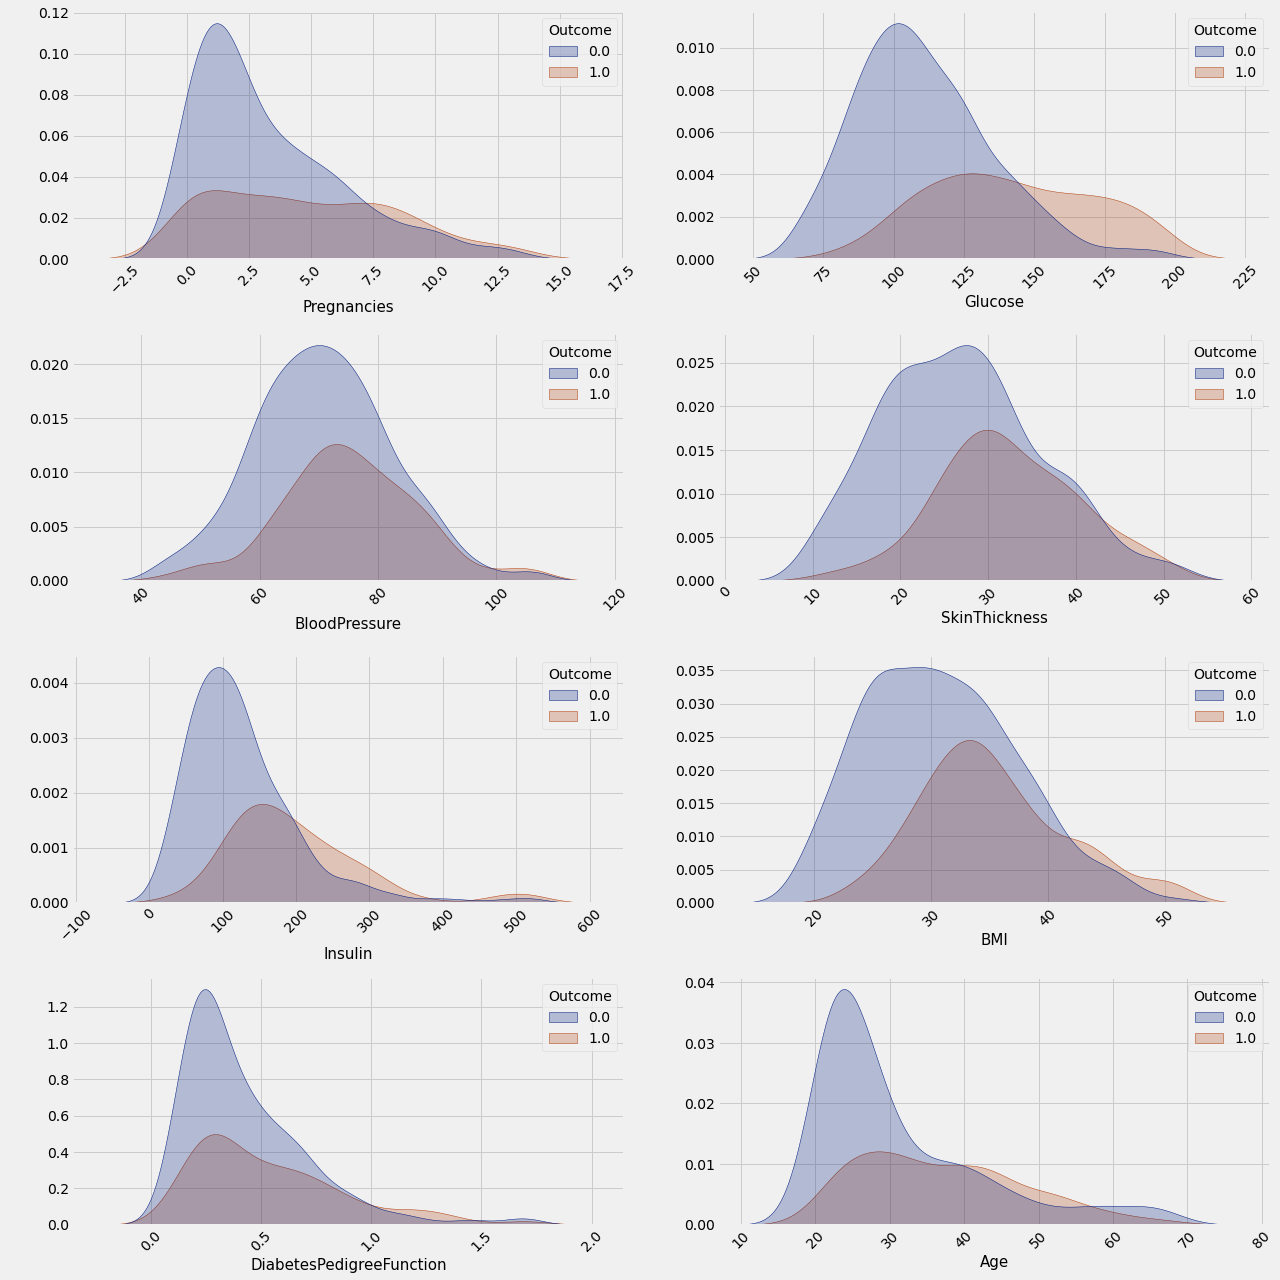

In [27]:
plt.figure(figsize = (18,18))
for i in enumerate(df_eda.drop(['Outcome'], axis = 1).columns):
  plt.subplot(4,2,i[0]+1)
  sns.kdeplot(data = df_eda, x = i[1], hue = 'Outcome', fill = 'dark', palette = 'dark' )
  plt.xlabel(i[1],fontsize = 15)
  plt.ylabel(" ")
  plt.xticks(rotation = 45)  
  plt.tight_layout()

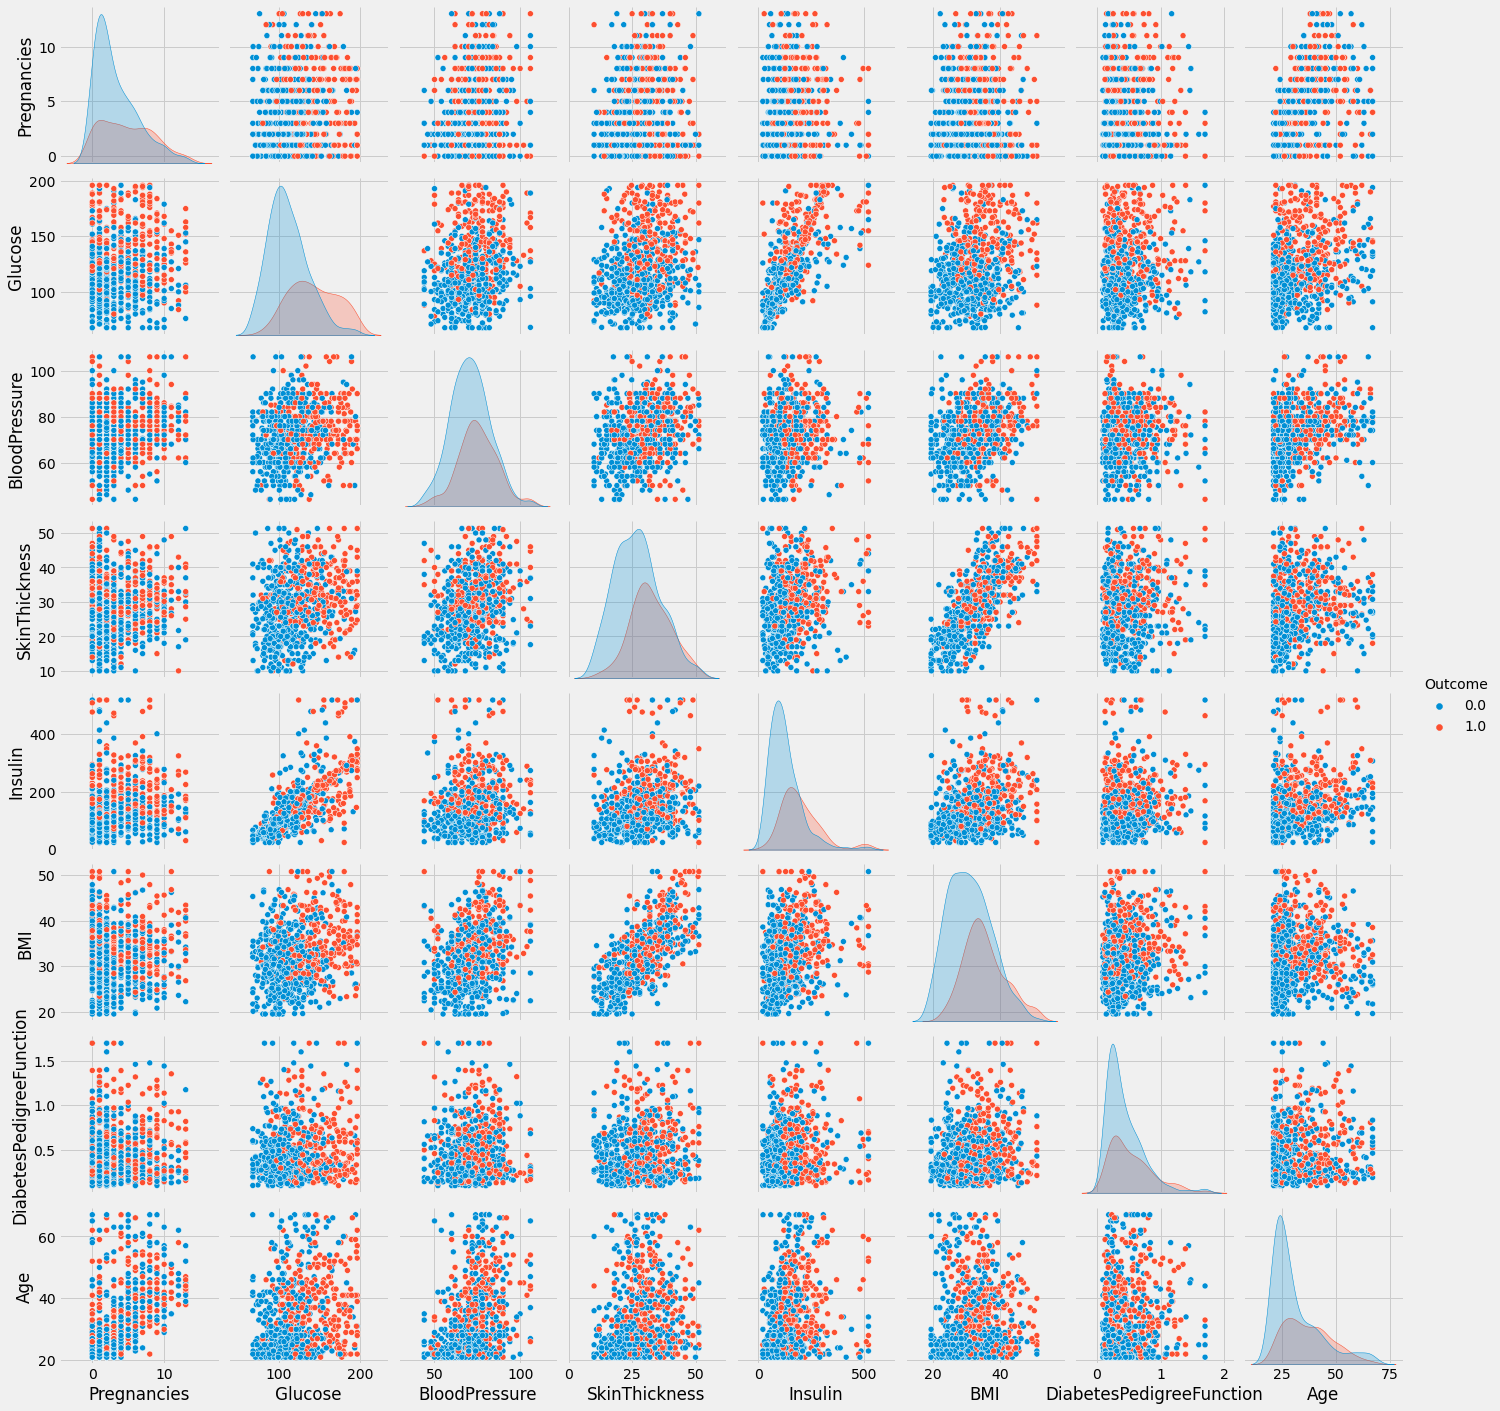

In [28]:
sns.pairplot(df_eda, hue = 'Outcome')

**Pearson's Correlation Coefficient** helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

# **Feature Transformation: QQ Plots**
- We'll check if the distribution is Normal or not using QQ plots. If not, then we will transform the variables accordingly to achieve the normal-distribution of variables. 

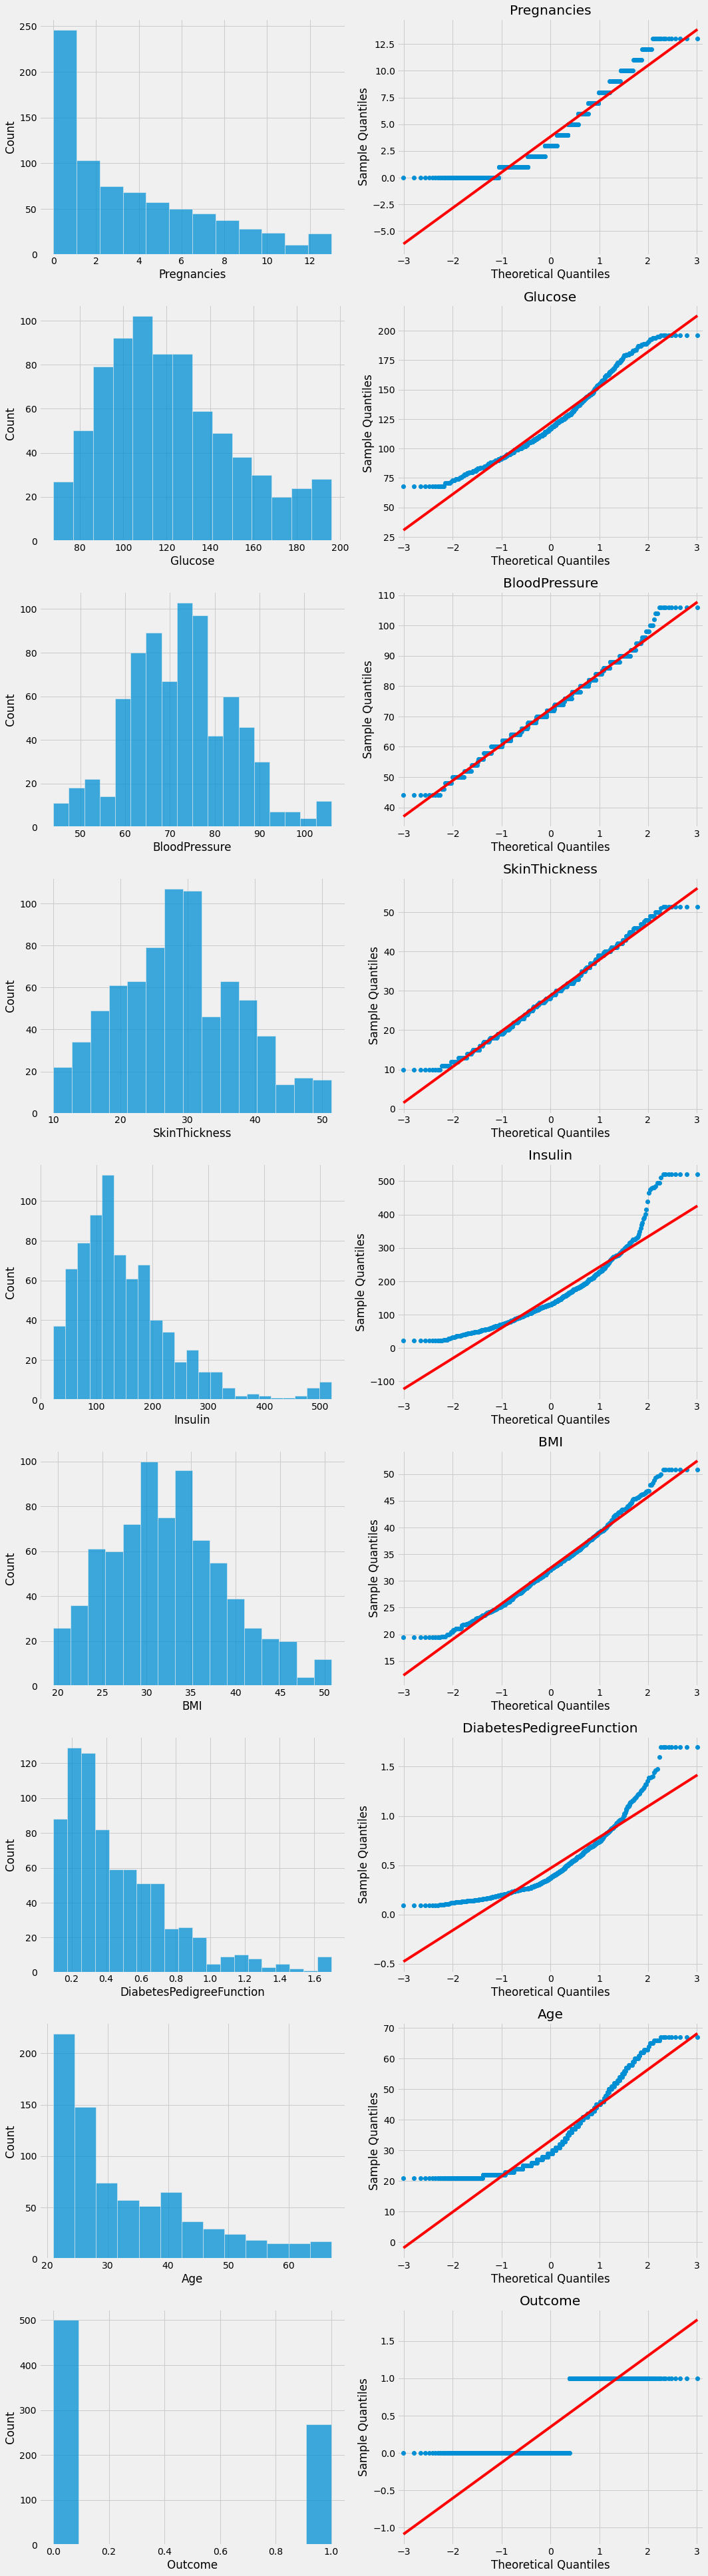

In [29]:
col_num = df_eda.columns
fig, axs = plt.subplots(len(col_num), 2,
                        figsize=(15, len(df_eda.columns)*6))

for i, col in enumerate(col_num):
    sns.histplot(df_eda[col], ax=axs[i, 0])
    sm.qqplot(df_eda[col].dropna(), line="s", ax=axs[i, 1], fmt='b')
    axs[i, 1].set_title(col)    
    plt.tight_layout()

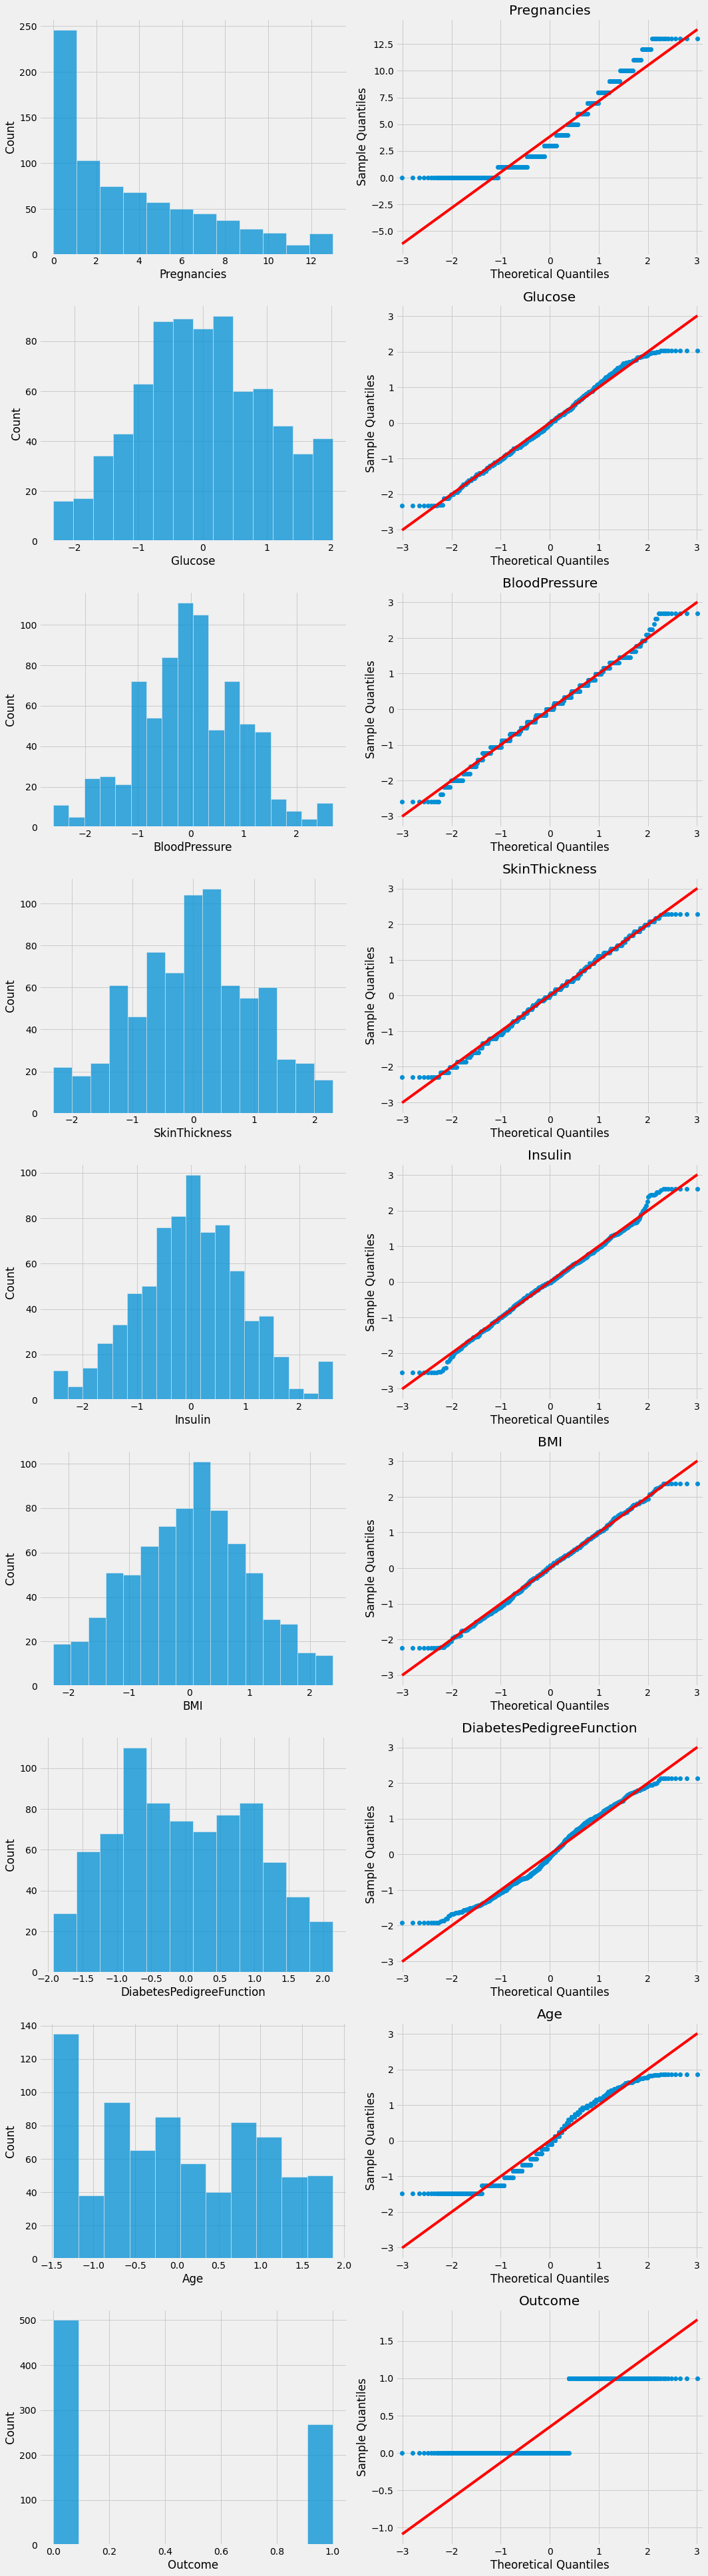

In [30]:
"""Transforming the Variables to attain Normal Distribution"""
pt = preprocessing.PowerTransformer()
for col in df_eda.drop(['Outcome', 'Pregnancies'], axis =1).columns:
  df_eda[col] = pt.fit_transform(df_eda[col].values.reshape(-1,1))

fig, axs = plt.subplots(len(col_num), 2,
                        figsize=(15, len(df_eda.columns)*6))

for i, col in enumerate(col_num):
    sns.histplot(df_eda[col], ax=axs[i, 0])
    sm.qqplot(df_eda[col].dropna(), line="s", ax=axs[i, 1], fmt='b')
    axs[i, 1].set_title(col)    
    plt.tight_layout()

In [31]:
"""Label Encoding Pregnancies Variable"""
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(list(df_eda['Pregnancies'].astype('str').values))
df_eda['Pregnancies'] = label_encoder.transform(df_eda['Pregnancies'].astype('str'))

## Observations:
- Data has been transformed using Power-Transformation from Scikit-learn.
- As there were no other transformation required for this data, we stopped with Power-Transforming data to achieve nearly normal-distributed data.

In [32]:
X = df_eda.drop(['Outcome'], axis =1)
Y = df_eda[['Outcome']]
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
col_X = list(X.columns)
col_y = list(Y.columns)
X_res,y_res=smk.fit_resample(X,Y)

print(X_res.shape,y_res.shape)

X = pd.DataFrame(X_res, columns = col_X)
Y = pd.DataFrame(y_res, columns = col_y)

df = X
df['Outcome'] = y_res
print(f"shape of dataset resampling: {df_eda.shape}")

from collections import Counter
print(f'Original dataset Outcome variable count {Counter(df_eda["Outcome"])}')
print(f'Resampled dataset Outcome variable count {Counter(df["Outcome"])}')

(960, 8) (960, 1)
shape of dataset resampling: (768, 9)
Original dataset Outcome variable count Counter({0.0: 500, 1.0: 268})
Resampled dataset Outcome variable count Counter({1.0: 480, 0.0: 480})


# Model Building
### Approach:
- Create a Baseline model KNN with Cross-Validation.
- Create other models and compare with KNN (baseline model)
- Use Optuna for hypertuning 
- Use Pipeline to create the pre-processing steps.
- Visualize the results from different models and select the best model.


## Evaluation
### Confusion Matrix

- **Confusion matrix**: A confusion matrix is a table that is often used to describe the performance of a classification model true positives (TP): These are cases in which we predicted yes.

- **true negatives (TN):** We predicted no, and they don't have the disease.

- **false positives (FP):** We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")

- **false negatives (FN):** We predicted no, but they actually do have the disease. (Also known as a "Type II error.")

- **precision** - What proportion of positive identifications was actually correct? 

- **recall** - What proportion of actual positives was identified correctly?

- **F1 Score:**
    - F1 Score is the weighted average of Precision and Recall
    - F1 is usually more useful than accuracy, especially if you have an uneven class distribution.

In [33]:
# Function to plot Confusion Matrix (to be used later).
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.copper_r):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # Hide grid lines
    plt.grid(False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [34]:
"""Using the Data for Model Building"""
df['Outcome'] = df['Outcome'].astype(int)
data_proc = df.copy()
# data_proc = df_eda.drop('isTrain', axis =1).copy()


In [35]:
"""Pre-Processed Data"""
data_proc.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0           10  0.921133      -0.001785       0.704430  0.892942  0.258656   
1            1 -1.351387      -0.520647       0.068328 -1.004163 -0.856693   
2           12  1.755539      -0.697422      -0.780487  1.276242 -1.463521   
3            1 -1.157825      -0.520647      -0.608528 -0.555098 -0.599987   
4            0  0.612706      -2.595201       0.704430  0.416162  1.512276   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.824581  1.367611        1  
1                 -0.170878  0.125601        0  
2                  0.939058  0.229443        1  
3                 -1.302174 -1.479142        0  
4                  2.138072  0.326766        1

In [36]:
"""Creating Train and Test Data"""
df_train, df_test = train_test_split(data_proc, test_size= 0.15, stratify=data_proc['Outcome'], random_state = 42)

"""Creating Features and Label"""
features = df_train.drop('Outcome', axis =1)
label = df_train.Outcome

## Hyper-Parameter Tuning for KNN

In [37]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## BaseLine Model: KNN

In [38]:
final_test_predictions_knn = [] #to store final test predictions
final_valid_predictions_knn = [] # to store final validation predictions
scores = [] #to store the scores
xtest, ytest = df_test.drop('Outcome', axis=1).copy(), df_test['Outcome'].copy()


for fold, (train_indicies, valid_indicies) in enumerate(skf.split(features,label )):   # creating Stratify-5-Folds
    xtrain, ytrain = features.iloc[train_indicies], label.iloc[train_indicies]         # creating xtrain, ytrain
    xvalid, yvalid = features.iloc[valid_indicies], label.iloc[valid_indicies]         # creating xvalid and yvalid

    # Model building using parameters obtain from Optuna hyper-parameter tuning
    params = {'n_neighbors': 17, 'algorithm': 'ball_tree', 'weights': 'distance',
              'metric': 'minkowski', 'leaf_size': 242}
    model_knn = KNeighborsClassifier(**params)                                            # instantiate KNeighborsClassifier Class
    model_knn.fit(xtrain, ytrain)                                                        # Training the model on training set

    preds_valid = model_knn.predict_proba(xvalid)[:, 1]                                  # Predicting Validation set 
    test_preds = model_knn.predict_proba(xtest)[:, 1]                                    # Predicting Test Set
    final_test_predictions_knn.append(test_preds)                                        # Appending test predictions to list
    final_valid_predictions_knn.append(preds_valid)                                      # Appending valid predictions to list
    roc_auc_score_valid = metrics.roc_auc_score(yvalid, preds_valid)                    # Evaluating valid predictions using roc_auc_curve      
    roc_auc_score_test = metrics.roc_auc_score(ytest, test_preds)                       # Evaluating test predictions using roc_auc_curve
    print(f'Fold {fold} AUC_valid: ', roc_auc_score_valid)                              # printing fold and respective roc_auc for validation set 
    print(f'Fold {fold} AUC_test: ', roc_auc_score_test)                                # printing fold and respective roc_auc for test set
    scores.append(roc_auc_score_valid)                                                  # Appending roc_auc_score to list.
    
print(np.mean(scores), np.std(scores))                                                  # printing mean and standard deviation of scores 

Fold 0 AUC_valid:  0.8560380725758476
Fold 0 AUC_test:  0.8423996913580246
Fold 1 AUC_valid:  0.8852755194218608
Fold 1 AUC_test:  0.8570601851851851
Fold 2 AUC_valid:  0.930593194820837
Fold 2 AUC_test:  0.8526234567901235
Fold 3 AUC_valid:  0.9010840108401085
Fold 3 AUC_test:  0.8171296296296295
Fold 4 AUC_valid:  0.8995784402288467
Fold 4 AUC_test:  0.842013888888889
0.8945138475775 0.024233317604553238


## Evaluation of Base model (KNN)

Confusion matrix, without normalization
[[33 39]
 [ 4 68]]


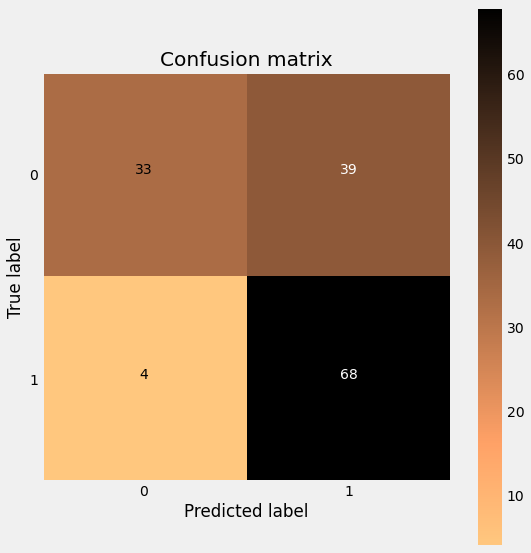

              precision    recall  f1-score   support

           0       0.89      0.46      0.61        72
           1       0.64      0.94      0.76        72

    accuracy                           0.70       144
   macro avg       0.76      0.70      0.68       144
weighted avg       0.76      0.70      0.68       144



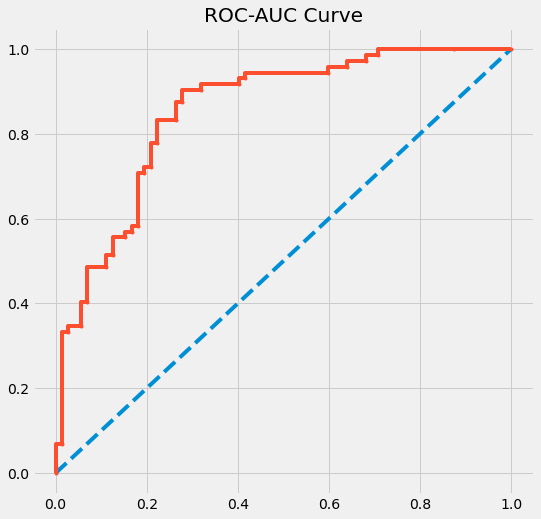

In [39]:
plt.figure(figsize = (8,8))
cnf_matrix=metrics.confusion_matrix(ytest,(np.mean(np.column_stack(final_test_predictions_knn), axis=1)).round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(ytest, (np.mean(np.column_stack(final_test_predictions_knn), axis=1)))
# plot no skill
plt.figure(figsize = (8,8))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC-AUC Curve')

print(metrics.classification_report(ytest,(np.mean(np.column_stack(final_test_predictions_knn), axis=1)).round()))

## Observations:
- We dont want to miss a diabetic patient. That mean we want False Positives to be as less as possible true i.e. True Label = 1 and Predicted Label = 0.
- More specifically we target the area **Precision of 0 and Recall of 1**
- Our model already have the value least, hence can be considered. 

### Next we'll train a few more models to see if we can beat this benchmark.

## Training a few models with their default parameters
- We will **train 11 different models** with thier **default parameters** and observe how does each model performs with their default params. 
- Models with **best AUC scores** will be **considered further and hypertuned**.

In [40]:
svc = SVC( kernel="linear", class_weight='balanced', probability=True )
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier( random_state=7)
abc = AdaBoostClassifier( random_state=7)
bc = BaggingClassifier(random_state=7)
etc = ExtraTreesClassifier(random_state=7)
gbdt = GradientBoostingClassifier(random_state=7)
xgb = XGBClassifier(random_state=7)
mlp = MLPClassifier(random_state=7,tol=1e-4)

clfs = {'SVC':svc,
    'KN' : knc, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb,
    'mlp': mlp
}

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    train_pred = clf.predict_proba(X_train)[:, 1]
    test_pred = clf.predict_proba(X_test)[:, 1]
    accuracy_train = clf.score(X_train,y_train )
    accuracy_test = clf.score(X_test,y_test)
    auc_train = metrics.roc_auc_score(y_train, train_pred)
    auc_test = metrics.roc_auc_score(y_test, test_pred)
    
    return accuracy_train,accuracy_test, auc_train, auc_test


accuracy_scores_tr = []
accuracy_scores_ts = []
auc_train_scores = []
auc_test_scores = []


X_train, X_test, y_train, y_test = train_test_split(data_proc.drop('Outcome', axis =1), data_proc['Outcome'], test_size= 0.2, 
                                                    random_state = 42)

for name,clf in clfs.items():
    
    current_accuracy_tr,current_accuracy_ts,auc_tr, auc_ts = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy Train - ",current_accuracy_tr)
    print("Accuracy Test - ",current_accuracy_ts)
    print("AUC Train - \n",auc_tr)
    print("AUC Test - \n",auc_ts)
    
    accuracy_scores_tr.append(current_accuracy_tr)
    accuracy_scores_ts.append(current_accuracy_ts)
    auc_train_scores.append(auc_tr)
    auc_test_scores.append(auc_ts)
    print()
    print("="*100)
    print()

For  SVC
Accuracy Train -  0.7799479166666666
Accuracy Test -  0.7864583333333334
AUC Train - 
 0.855952502120441
AUC Test - 
 0.8665571975916804


For  KN
Accuracy Train -  0.84765625
Accuracy Test -  0.8229166666666666
AUC Train - 
 0.9419745547073792
AUC Test - 
 0.890968801313629


For  DT
Accuracy Train -  1.0
Accuracy Test -  0.78125
AUC Train - 
 1.0
AUC Test - 
 0.7832512315270936


For  LR
Accuracy Train -  0.7734375
Accuracy Test -  0.7760416666666666
AUC Train - 
 0.856047497879559
AUC Test - 
 0.8745484400656813


For  RF
Accuracy Train -  1.0
Accuracy Test -  0.8489583333333334
AUC Train - 
 1.0
AUC Test - 
 0.9240831964969897


For  AdaBoost
Accuracy Train -  0.8528645833333334
Accuracy Test -  0.8072916666666666
AUC Train - 
 0.9390907548770144
AUC Test - 
 0.8831964969896005


For  BgC
Accuracy Train -  0.9921875
Accuracy Test -  0.828125
AUC Train - 
 0.9991789652247668
AUC Test - 
 0.8908045977011494


For  ETC
Accuracy Train -  1.0
Accuracy Test -  0.8854166666666666

In [41]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy Test':accuracy_scores_ts,
                               'AUC Test':auc_test_scores,}).sort_values(by = 'AUC Test', ascending= False).style.background_gradient(cmap = 'RdBu', subset = [ 'AUC Test', 'Accuracy Test'	])
performance_df

## **Observations:**
- Models are not generalized, reason could be less data (768 rows), hence we will try to use KFold which will help us to get more samples and train a better model with available data. 
- Selected Model: **ExtraTreeClassifier, RandomForest, XGBoost, MultiLayerPerceptron** 
- We will hypertune parameters for these parameters and Finally use **Voting Classifier** with 5 models namely: **KNN, ExtraTreeClassifier, RandomForest, XGBoost, MultiLayerPerceptron**

## **Training RandomForest with tuned hyper-parameters**

In [42]:
final_test_predictions_rf = [] #to store final test predictions
final_valid_predictions_rf = [] # to store final validation predictions
scores = [] #to store the scores
xtest, ytest = df_test.drop('Outcome', axis=1).copy(), df_test['Outcome'].copy()


for fold, (train_indicies, valid_indicies) in enumerate(skf.split(features,label )):   # creating Stratify-5-Folds
    xtrain, ytrain = features.iloc[train_indicies], label.iloc[train_indicies]         # creating xtrain, ytrain
    xvalid, yvalid = features.iloc[valid_indicies], label.iloc[valid_indicies]         # creating xvalid and yvalid

    # Model building using parameters obtain from Optuna hyper-parameter tuning
    # params = trial_rf.params 
    params = {'n_estimators': 235, 'max_depth': 137, 'criterion': 'entropy', 'max_features': 'log2', 'oob_score': True}
    model_rf = RandomForestClassifier(**params)                      # instantiate RandomForestClassifier Class
    model_rf.fit(xtrain, ytrain)                                                        # Training the model on training set

    preds_valid = model_rf.predict_proba(xvalid)[:, 1]                                  # Predicting Validation set 
    test_preds = model_rf.predict_proba(xtest)[:, 1]                                    # Predicting Test Set
    final_test_predictions_rf.append(test_preds)                                        # Appending test predictions to list
    final_valid_predictions_rf.append(preds_valid)                                      # Appending valid predictions to list
    roc_auc_score_valid = metrics.roc_auc_score(yvalid, preds_valid)                    # Evaluating valid predictions using roc_auc_curve      
    roc_auc_score_test = metrics.roc_auc_score(ytest, test_preds)                       # Evaluating test predictions using roc_auc_curve
    print(f'Fold {fold} AUC_valid: ', roc_auc_score_valid)                              # printing fold and respective roc_auc for validation set 
    print(f'Fold {fold} AUC_test: ', roc_auc_score_test)                                # printing fold and respective roc_auc for test set
    scores.append(roc_auc_score_valid)                                                  # Appending roc_auc_score to list.
    
print(np.mean(scores), np.std(scores))                                                  # printing mean and standard deviation of scores 

Fold 0 AUC_valid:  0.9006543723973824
Fold 0 AUC_test:  0.8623649691358025
Fold 1 AUC_valid:  0.905299608551641
Fold 1 AUC_test:  0.8563850308641976
Fold 2 AUC_valid:  0.9311954230653418
Fold 2 AUC_test:  0.8695987654320988
Fold 3 AUC_valid:  0.9302168021680217
Fold 3 AUC_test:  0.8489583333333334
Fold 4 AUC_valid:  0.9013098464317977
Fold 4 AUC_test:  0.8756751543209876
0.913735210522837 0.013951052036773019


## Evaluation of RandomForest Model

Confusion matrix, without normalization
[[53 19]
 [ 7 65]]


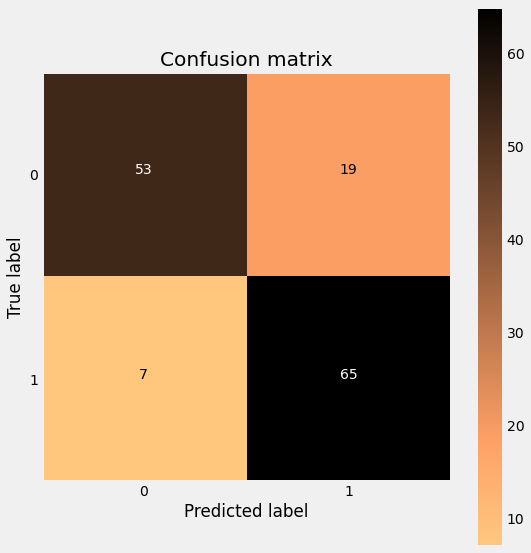

              precision    recall  f1-score   support

           0       0.88      0.74      0.80        72
           1       0.77      0.90      0.83        72

    accuracy                           0.82       144
   macro avg       0.83      0.82      0.82       144
weighted avg       0.83      0.82      0.82       144



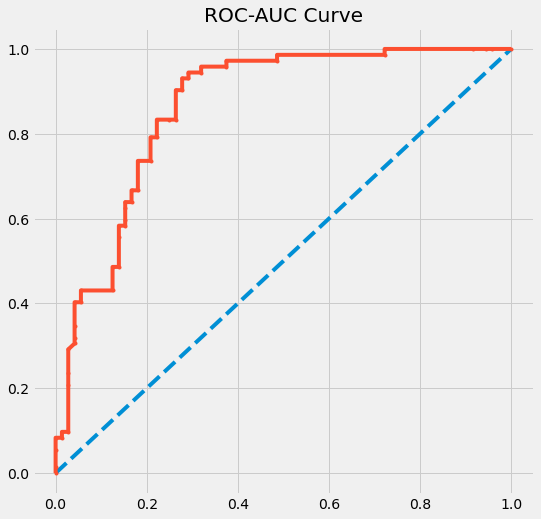

In [43]:
plt.figure(figsize = (8,8))
cnf_matrix=metrics.confusion_matrix(ytest,(np.mean(np.column_stack(final_test_predictions_rf), axis=1)).round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(ytest, (np.mean(np.column_stack(final_test_predictions_rf), axis=1)))
# plot no skill
plt.figure(figsize = (8,8))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC-AUC Curve')

print(metrics.classification_report(ytest,(np.mean(np.column_stack(final_test_predictions_rf), axis=1)).round()))

## **Observations:**
- Even though **RandomForest has more AUC than KNN**. But **KNN had lesser False Positives**.
- We dont want to miss a diabetic patient. That mean we want False Positives to be as less as possible true i.e. True Label = 1 and Predicted Label = 0.
- More specifically we target the area **Precision of 0 and Recall of 1**
- RandomForest model have more FP than KNN but overall performance of this model is much better i.e. better accuracy, f1-score and lesser False Negatives when compared to KNN, its kind of a trade-off which i believe RF has better performance probability when compared to KNN.   

## Training ExtraTreesClassifier with tuned hyper-parameters

18

In [44]:
final_test_predictions_etc = [] #to store final test predictions
final_valid_predictions_etc = [] # to store final validation predictions
scores = [] #to store the scores
xtest, ytest = df_test.drop('Outcome', axis=1).copy(), df_test['Outcome'].copy()


for fold, (train_indicies, valid_indicies) in enumerate(skf.split(features,label )):   # creating Stratify-5-Folds
    xtrain, ytrain = features.iloc[train_indicies], label.iloc[train_indicies]         # creating xtrain, ytrain
    xvalid, yvalid = features.iloc[valid_indicies], label.iloc[valid_indicies]         # creating xvalid and yvalid

    # Model building using parameters obtain from Optuna hyper-parameter tuning
    # params = trial_etc.params
    params = {'n_estimators': 79, 'max_depth': 300, 'criterion': 'gini', 'max_features': 'auto', 'oob_score': True}
    model_etc = ExtraTreesClassifier(**params, bootstrap = True, random_state = 6)                         # instantiate ExtraTreesClassifier Class
    model_etc.fit(xtrain, ytrain)                                                        # Training the model on training set

    preds_valid = model_etc.predict_proba(xvalid)[:, 1]                                  # Predicting Validation set 
    test_preds = model_etc.predict_proba(xtest)[:, 1]                                    # Predicting Test Set
    final_test_predictions_etc.append(test_preds)                                        # Appending test predictions to list
    final_valid_predictions_etc.append(preds_valid)                                      # Appending valid predictions to list
    roc_auc_score_valid = metrics.roc_auc_score(yvalid, preds_valid)                    # Evaluating valid predictions using roc_auc_curve      
    roc_auc_score_test = metrics.roc_auc_score(ytest, test_preds)                       # Evaluating test predictions using roc_auc_curve
    print(f'Fold {fold} AUC_valid: ', roc_auc_score_valid)                              # printing fold and respective roc_auc for validation set 
    print(f'Fold {fold} AUC_test: ', roc_auc_score_test)                                # printing fold and respective roc_auc for test set
    scores.append(roc_auc_score_valid)                                                  # Appending roc_auc_score to list.

print(np.mean(scores), np.std(scores))

Fold 0 AUC_valid:  0.9060083283759668
Fold 0 AUC_test:  0.8777006172839505
Fold 1 AUC_valid:  0.9229147847034026
Fold 1 AUC_test:  0.882908950617284
Fold 2 AUC_valid:  0.9485094850948509
Fold 2 AUC_test:  0.8908179012345678
Fold 3 AUC_valid:  0.9421860885275519
Fold 3 AUC_test:  0.8779899691358024
Fold 4 AUC_valid:  0.9113218909966878
Fold 4 AUC_test:  0.8840663580246915
0.926188115539692 0.016692044904315


## Evaluation of ExtraTreesClassifier

Confusion matrix, without normalization
[[51 21]
 [ 4 68]]


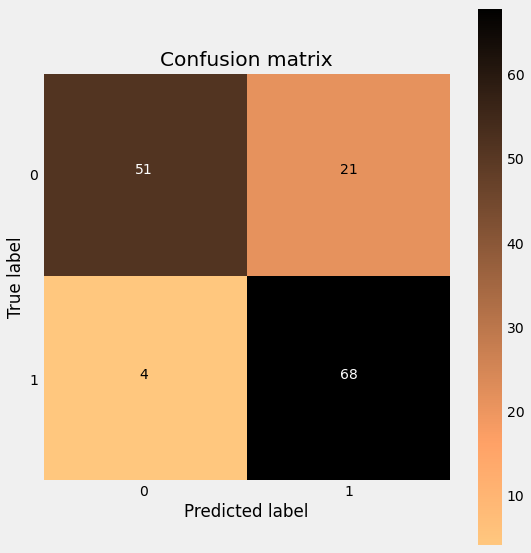

              precision    recall  f1-score   support

           0       0.93      0.71      0.80        72
           1       0.76      0.94      0.84        72

    accuracy                           0.83       144
   macro avg       0.85      0.83      0.82       144
weighted avg       0.85      0.83      0.82       144



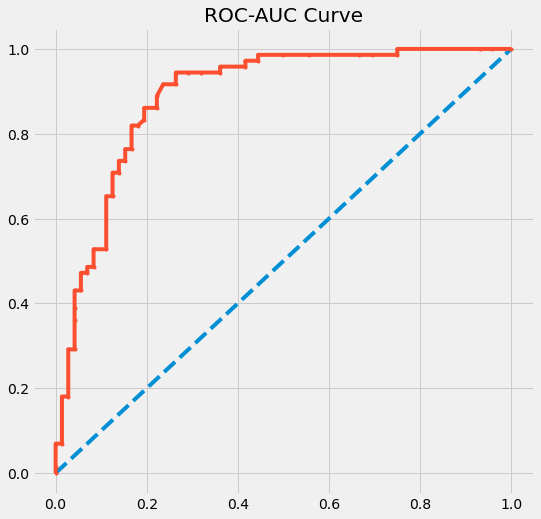

In [45]:
plt.figure(figsize = (8,8))
cnf_matrix=metrics.confusion_matrix(ytest,(np.mean(np.column_stack(final_test_predictions_etc), axis=1)).round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(ytest, (np.mean(np.column_stack(final_test_predictions_etc), axis=1)))
# plot no skill
plt.figure(figsize = (8,8))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC-AUC Curve')

print(metrics.classification_report(ytest,(np.mean(np.column_stack(final_test_predictions_etc), axis=1)).round()))

## Observations:
- Even though **ExtraTreesClassifier has more AUC than KNN and RandomForest**. But **KNN had lesser False Positives**.
- We dont want to miss a diabetic patient. That mean we want False Positives to be as less as possible true i.e. True Label = 1 and Predicted Label = 0.
- More specifically we target the area **Precision of 0 and Recall of 1**
- ExtraTreesClassifier model still have lesser FP, hence can be considered for Voting Classifier

## Training XGBClassifier with tuned hyper-parameters

In [46]:
final_test_predictions_xgb = [] #to store final test predictions
final_valid_predictions_xgb = [] # to store final validation predictions
scores = [] #to store the scores
xtest, ytest = df_test.drop('Outcome', axis=1).copy(), df_test['Outcome'].copy()


for fold, (train_indicies, valid_indicies) in enumerate(skf.split(features,label )):   # creating Stratify-5-Folds
    xtrain, ytrain = features.iloc[train_indicies], label.iloc[train_indicies]         # creating xtrain, ytrain
    xvalid, yvalid = features.iloc[valid_indicies], label.iloc[valid_indicies]         # creating xvalid and yvalid

    # Model building using parameters obtain from Optuna hyper-parameter tuning
    # params = trial_xgb.params
    params = {'max_depth': 208, 'n_estimators': 616, 'eta': 0.012786688162334569, 'subsample': 0.9, 'colsample_bytree': 0.8, 
      'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.009205157727051775,
      'reg_lambda': 0.4237493776682705, 'reg_alpha': 0.0357459259751965, 'gamma': 0.0012862253712724995}

    model_xgb = XGBClassifier(**params)                                                # instantiate XGBClassifier Class
    model_xgb.fit(xtrain, ytrain)                                                      # Training the model on training set

    preds_valid = model_xgb.predict_proba(xvalid)[:, 1]                                # Predicting Validation set 
    test_preds = model_xgb.predict_proba(xtest)[:, 1]                                  # Predicting Test Set
    final_test_predictions_xgb.append(test_preds)                                      # Appending test predictions to list
    final_valid_predictions_xgb.append(preds_valid)                                    # Appending valid predictions to list
    roc_auc_score_valid = metrics.roc_auc_score(yvalid, preds_valid)                   # Evaluating valid predictions using roc_auc_curve      
    roc_auc_score_test = metrics.roc_auc_score(ytest, test_preds)                      # Evaluating test predictions using roc_auc_curve
    print(f'Fold {fold} AUC_valid: ', roc_auc_score_valid)                             # printing fold and respective roc_auc for validation set 
    print(f'Fold {fold} AUC_test: ', roc_auc_score_test)                               # printing fold and respective roc_auc for test set
    scores.append(roc_auc_score_valid)                                                 # Appending roc_auc_score to list.
    
print(np.mean(scores), np.std(scores))                                                 # printing mean and standard deviation of scores 

Fold 0 AUC_valid:  0.9028851873884592
Fold 0 AUC_test:  0.8545524691358025
Fold 1 AUC_valid:  0.9101174345076783
Fold 1 AUC_test:  0.8674768518518519
Fold 2 AUC_valid:  0.9280337247816923
Fold 2 AUC_test:  0.8713348765432098
Fold 3 AUC_valid:  0.9345076784101174
Fold 3 AUC_test:  0.8572530864197531
Fold 4 AUC_valid:  0.9019873532068654
Fold 4 AUC_test:  0.8728780864197532
0.9155062756589626 0.013334789315063093


## Evaluation of XGBoost Classifier

Confusion matrix, without normalization
[[51 21]
 [ 5 67]]


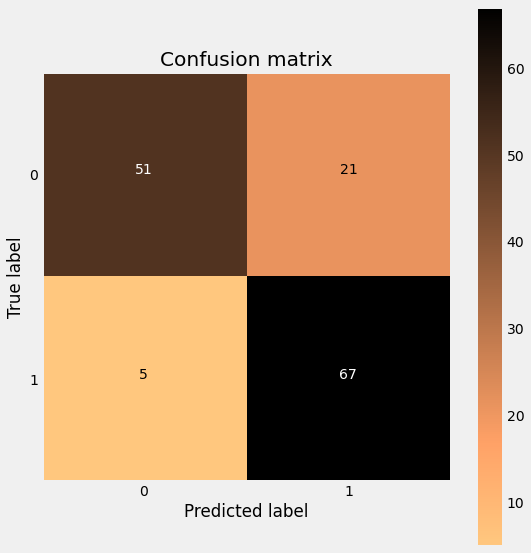

              precision    recall  f1-score   support

           0       0.91      0.71      0.80        72
           1       0.76      0.93      0.84        72

    accuracy                           0.82       144
   macro avg       0.84      0.82      0.82       144
weighted avg       0.84      0.82      0.82       144



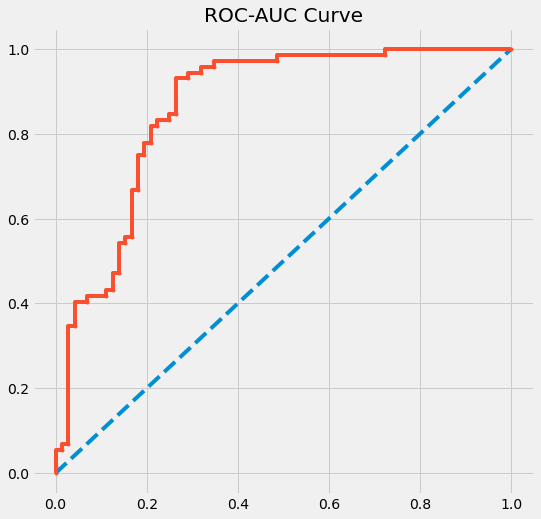

In [47]:
plt.figure(figsize = (8,8))
cnf_matrix=metrics.confusion_matrix(ytest,(np.mean(np.column_stack(final_test_predictions_xgb), axis=1)).round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(ytest, (np.mean(np.column_stack(final_test_predictions_xgb), axis=1)))
# plot no skill
plt.figure(figsize = (8,8))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC-AUC Curve')

print(metrics.classification_report(ytest,(np.mean(np.column_stack(final_test_predictions_xgb), axis=1)).round()))

## Observations:
- XGBClassifier has lesser AUC than ExtraTreesClassifier and more AUC than KNN and RandomForest**. But **KNN had lesser False Positives. 
- We dont want to miss a diabetic patient. That mean we want False Positives to be as less as possible true i.e. True Label = 1 and Predicted Label = 0.
- More specifically we target the area **Precision of 0 and Recall of 1**
- XGBClassifier model still have lesser FP, hence can be considered for Voting Classifier.

## **Training Multi-Layer Perceptron with tuned hyper-parameters**

In [48]:
final_test_predictions_mlp = [] #to store final test predictions
final_valid_predictions_mlp = [] # to store final validation predictions
scores = [] #to store the scores
xtest, ytest = df_test.drop('Outcome', axis=1).copy(), df_test['Outcome'].copy()


for fold, (train_indicies, valid_indicies) in enumerate(skf.split(features,label )):   # creating Stratify-5-Folds
    xtrain, ytrain = features.iloc[train_indicies], label.iloc[train_indicies]         # creating xtrain, ytrain
    xvalid, yvalid = features.iloc[valid_indicies], label.iloc[valid_indicies]         # creating xvalid and yvalid

    # Model building using parameters obtain from Optuna hyper-parameter tuning
    # params = trial_mlp.params
    params = {'alpha': 0.001931587917122388, 'hidden_layer_sizes': 93, 'max_iter': 189}
    model_mlp = MLPClassifier(**params, random_state = 18)                                                 # instantiate MLPClassifier Class
    model_mlp.fit(xtrain, ytrain)                                                        # Training the model on training set

    preds_valid = model_mlp.predict_proba(xvalid)[:, 1]                                  # Predicting Validation set 
    test_preds = model_mlp.predict_proba(xtest)[:, 1]                                    # Predicting Test Set
    final_test_predictions_mlp.append(test_preds)                                        # Appending test predictions to list
    final_valid_predictions_mlp.append(preds_valid)                                      # Appending valid predictions to list
    roc_auc_score_valid = metrics.roc_auc_score(yvalid, preds_valid)                    # Evaluating valid predictions using roc_auc_curve      
    roc_auc_score_test = metrics.roc_auc_score(ytest, test_preds)                       # Evaluating test predictions using roc_auc_curve
    print(f'Fold {fold} AUC_valid: ', roc_auc_score_valid)                              # printing fold and respective roc_auc for validation set 
    print(f'Fold {fold} AUC_test: ', roc_auc_score_test)                                # printing fold and respective roc_auc for test set
    scores.append(roc_auc_score_valid)                                                  # Appending roc_auc_score to list.
    
print(np.mean(scores), np.std(scores))                                                  # printing mean and standard deviation of scores 

Fold 0 AUC_valid:  0.8677870315288518
Fold 0 AUC_test:  0.835648148148148
Fold 1 AUC_valid:  0.8720264980427582
Fold 1 AUC_test:  0.8344907407407408
Fold 2 AUC_valid:  0.905299608551641
Fold 2 AUC_test:  0.8373842592592593
Fold 3 AUC_valid:  0.8854260764829871
Fold 3 AUC_test:  0.8360339506172839
Fold 4 AUC_valid:  0.8792532369768142
Fold 4 AUC_test:  0.8532021604938271
0.8819584903166104 0.013142488840523351


Confusion matrix, without normalization
[[50 22]
 [ 8 64]]


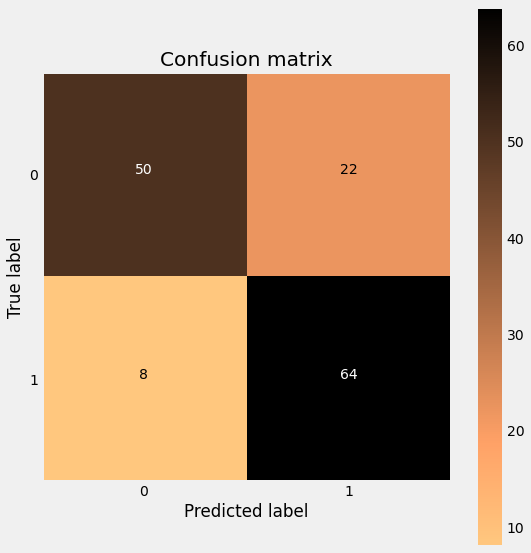

              precision    recall  f1-score   support

           0       0.86      0.69      0.77        72
           1       0.74      0.89      0.81        72

    accuracy                           0.79       144
   macro avg       0.80      0.79      0.79       144
weighted avg       0.80      0.79      0.79       144



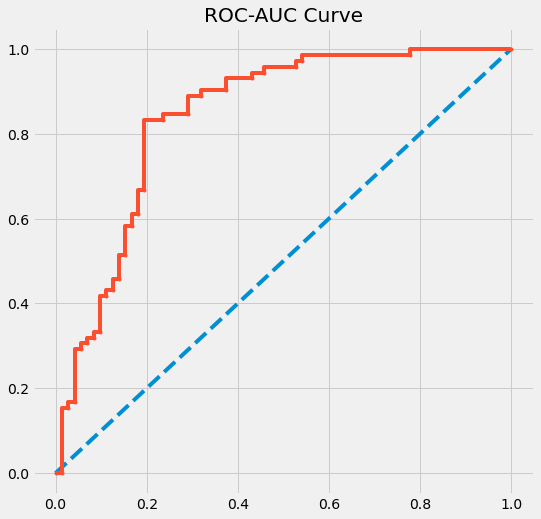

In [49]:
plt.figure(figsize = (8,8))
cnf_matrix=metrics.confusion_matrix(ytest,(np.mean(np.column_stack(final_test_predictions_mlp), axis=1)).round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(ytest, (np.mean(np.column_stack(final_test_predictions_mlp), axis=1)))
# plot no skill
plt.figure(figsize = (8,8))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC-AUC Curve')

print(metrics.classification_report(ytest,(np.mean(np.column_stack(final_test_predictions_mlp), axis=1)).round()))

## Observations:
- **Multi-Layer Perceptron has lesser AUC than KNN and all other classifier we trained**. Moreover **KNN had lesser False Positives**. 
- We dont want to miss a diabetic patient. That mean we want False Positives to be as less as possible true i.e. True Label = 1 and Predicted Label = 0.
- More specifically we target the area **Precision of 0 and Recall of 1**
- Multi-Layer Perceptron is a Neural Network model and still have lesser FP, hence can be considered for Voting Classifier to capture some more hidden patterns.

## Training SVC with tuned hyper-Parameters

In [50]:
final_test_predictions_svc = [] #to store final test predictions
final_valid_predictions_svc = [] # to store final validation predictions
scores = [] #to store the scores
xtest, ytest = df_test.drop('Outcome', axis=1).copy(), df_test['Outcome'].copy()


for fold, (train_indicies, valid_indicies) in enumerate(skf.split(features,label )):   # creating Stratify-5-Folds
    xtrain, ytrain = features.iloc[train_indicies], label.iloc[train_indicies]         # creating xtrain, ytrain
    xvalid, yvalid = features.iloc[valid_indicies], label.iloc[valid_indicies]         # creating xvalid and yvalid

    # Model building using parameters obtain from Optuna hyper-parameter tuning
    # params = trial_svc.params
    params = {'C': 1.835976773436064, 'max_iter': 849, 'kernel': 'rbf', 'gamma': 'scale', 'class_weight': 'balanced', 'probability': True}
    model_svc = SVC(**params)                                                           # instantiate SVC Class
    model_svc.fit(xtrain, ytrain)                                                       # Training the model on training set

    preds_valid = model_svc.predict_proba(xvalid)[:, 1]                                 # Predicting Validation set 
    test_preds = model_svc.predict_proba(xtest)[:, 1]                                   # Predicting Test Set
    final_test_predictions_svc.append(test_preds)                                       # Appending test predictions to list
    final_valid_predictions_svc.append(preds_valid)                                     # Appending valid predictions to list
    roc_auc_score_valid = metrics.roc_auc_score(yvalid, preds_valid)                    # Evaluating valid predictions using roc_auc_curve      
    roc_auc_score_test = metrics.roc_auc_score(ytest, test_preds)                       # Evaluating test predictions using roc_auc_curve
    print(f'Fold {fold} AUC_valid: ', roc_auc_score_valid)                              # printing fold and respective roc_auc for validation set 
    print(f'Fold {fold} AUC_test: ', roc_auc_score_test)                                # printing fold and respective roc_auc for test set
    scores.append(roc_auc_score_valid)                                                  # Appending roc_auc_score to list.
    
print(np.mean(scores), np.std(scores))                                                  # printing mean and standard deviation of scores 

Fold 0 AUC_valid:  0.8478584176085664
Fold 0 AUC_test:  0.7945601851851852
Fold 1 AUC_valid:  0.8699186991869918
Fold 1 AUC_test:  0.7981288580246914
Fold 2 AUC_valid:  0.8855766335441133
Fold 2 AUC_test:  0.787133487654321
Fold 3 AUC_valid:  0.871800662451069
Fold 3 AUC_test:  0.7903163580246914
Fold 4 AUC_valid:  0.8786510087323096
Fold 4 AUC_test:  0.8051697530864197
0.8707610843046101 0.012712780057422554


## Evaluation of SVC

Confusion matrix, without normalization
[[46 26]
 [13 59]]


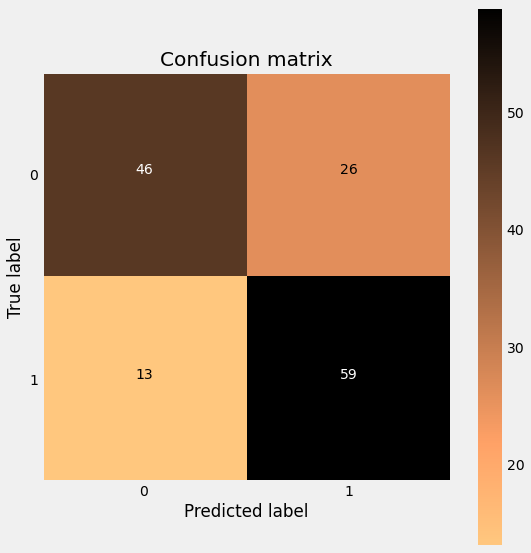

              precision    recall  f1-score   support

           0       0.78      0.64      0.70        72
           1       0.69      0.82      0.75        72

    accuracy                           0.73       144
   macro avg       0.74      0.73      0.73       144
weighted avg       0.74      0.73      0.73       144



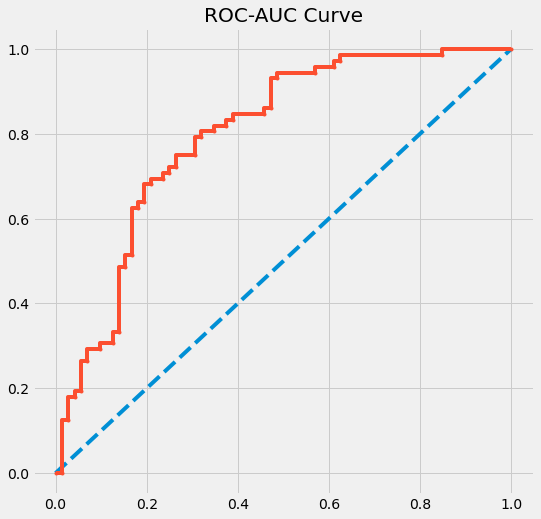

In [51]:
plt.figure(figsize = (8,8))
cnf_matrix=metrics.confusion_matrix(ytest,(np.mean(np.column_stack(final_test_predictions_svc), axis=1)).round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(ytest, (np.mean(np.column_stack(final_test_predictions_svc), axis=1)))
# plot no skill
plt.figure(figsize = (8,8))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC-AUC Curve')

print(metrics.classification_report(ytest,(np.mean(np.column_stack(final_test_predictions_svc), axis=1)).round()))

## Observations:
- **SVC has lesser AUC than KNN and all other classifier we trained. SVC was generalized when trained with default parameters (metrics used was accuracy)**. Moreover **KNN had lesser False Positives**. 
- We dont want to miss a diabetic patient. That mean we want False Positives to be as less as possible true i.e. True Label = 1 and Predicted Label = 0.
- More specifically we target the area **Precision of 0 and Recall of 1**
- Eventhough SVC was a generalized model, now its making too many erros, hence we will not try this model in Voting Classifier.

## Training Logistic Regression with tuned hyper-parameters

In [52]:
final_test_predictions_lr = []                                                         # To store final test predictions
final_valid_predictions_lr = []                                                        # To store final validation predictions
scores = []                                                                             # To store the scores
xtest, ytest = df_test.drop('Outcome', axis=1).copy(), df_test['Outcome'].copy()


for fold, (train_indicies, valid_indicies) in enumerate(skf.split(features,label )):   # creating Stratify-5-Folds
    xtrain, ytrain = features.iloc[train_indicies], label.iloc[train_indicies]         # creating xtrain, ytrain
    xvalid, yvalid = features.iloc[valid_indicies], label.iloc[valid_indicies]         # creating xvalid and yvalid

    # Model building using parameters obtain from Optuna hyper-parameter tuning
    # params = trial_lr.params
    params = {'C': 4.141877479565224, 'max_iter': 314, 'penalty': 'l2', 'solver': 'liblinear'}
    model_lr = LogisticRegression(**params)                                            # instantiate LogisticRegression Class
    model_lr.fit(xtrain, ytrain)                                                       # Training the model on training set

    preds_valid = model_lr.predict_proba(xvalid)[:, 1]                                 # Predicting Validation set 
    test_preds = model_lr.predict_proba(xtest)[:, 1]                                   # Predicting Test Set
    final_test_predictions_lr.append(test_preds)                                       # Appending test predictions to list
    final_valid_predictions_lr.append(preds_valid)                                     # Appending valid predictions to list
    roc_auc_score_valid = metrics.roc_auc_score(yvalid, preds_valid)                    # Evaluating valid predictions using roc_auc_curve      
    roc_auc_score_test = metrics.roc_auc_score(ytest, test_preds)                       # Evaluating test predictions using roc_auc_curve
    print(f'Fold {fold} AUC_valid: ', roc_auc_score_valid)                              # printing fold and respective roc_auc for validation set 
    print(f'Fold {fold} AUC_test: ', roc_auc_score_test)                                # printing fold and respective roc_auc for test set
    scores.append(roc_auc_score_valid)                                                  # Appending roc_auc_score to list.
    
print(np.mean(scores), np.std(scores))                                                  # printing mean and standard deviation of scores 

Fold 0 AUC_valid:  0.8265913146936348
Fold 0 AUC_test:  0.78125
Fold 1 AUC_valid:  0.8915989159891599
Fold 1 AUC_test:  0.7822145061728395
Fold 2 AUC_valid:  0.8774465522433001
Fold 2 AUC_test:  0.7816358024691358
Fold 3 AUC_valid:  0.8637458596808191
Fold 3 AUC_test:  0.7866512345679012
Fold 4 AUC_valid:  0.8697681421258657
Fold 4 AUC_test:  0.7878086419753086
0.8658301569465559 0.021718694003093533


## Evaluation of Logistic Regression

Confusion matrix, without normalization
[[50 22]
 [22 50]]


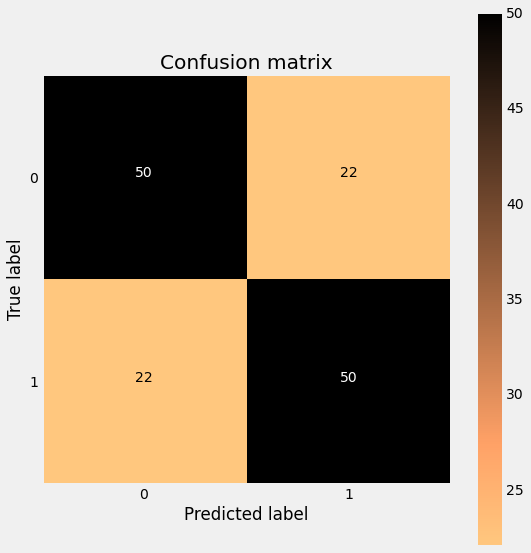

              precision    recall  f1-score   support

           0       0.69      0.69      0.69        72
           1       0.69      0.69      0.69        72

    accuracy                           0.69       144
   macro avg       0.69      0.69      0.69       144
weighted avg       0.69      0.69      0.69       144



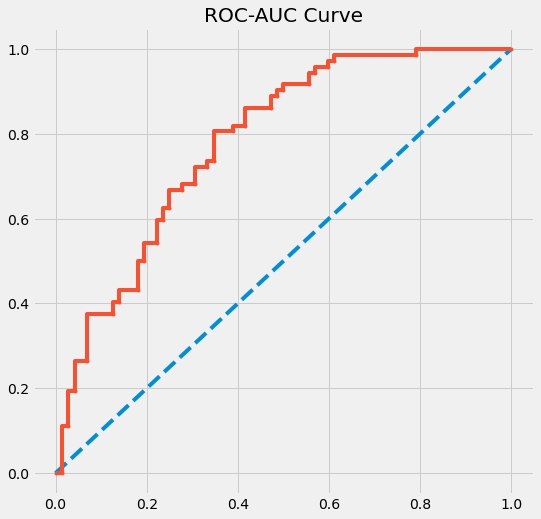

In [53]:
plt.figure(figsize = (8,8))
cnf_matrix=metrics.confusion_matrix(ytest,(np.mean(np.column_stack(final_test_predictions_lr), axis=1)).round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(ytest, (np.mean(np.column_stack(final_test_predictions_lr), axis=1)))
# plot no skill
plt.figure(figsize = (8,8))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC-AUC Curve')

print(metrics.classification_report(ytest,(np.mean(np.column_stack(final_test_predictions_lr), axis=1)).round()))

##  Observations:
- **SVC has lesser AUC than KNN and all other classifier we trained. SVC was generalized when trained with default parameters (metrics used was accuracy)**. Moreover **KNN had lesser False Positives**. 
- We dont want to miss a diabetic patient. That mean we want False Positives to be as less as possible true i.e. True Label = 1 and Predicted Label = 0.
- More specifically we target the area **Precision of 0 and Recall of 1**
- Even though Logistic Regression was a generalized model with default params but it have equal FP as FN, hence we will not consider this model in Voting Classifier.

In [54]:
final_test_predictions_vclf = [] #to store final test predictions
final_valid_predictions_vclf = [] # to store final validation predictions
scores = [] #to store the scores
xtest, ytest = df_test.drop('Outcome', axis=1).copy(), df_test['Outcome'].copy()


for fold, (train_indicies, valid_indicies) in enumerate(skf.split(features,label )):   # creating Stratify-5-Folds
    xtrain, ytrain = features.iloc[train_indicies], label.iloc[train_indicies]         # creating xtrain, ytrain
    xvalid, yvalid = features.iloc[valid_indicies], label.iloc[valid_indicies]         # creating xvalid and yvalid

    # Model building using parameters obtain from Optuna hyper-parameter tuning
    # params = trial_lr.params

    model_vclf = VotingClassifier(estimators=[ 
                                              ('KNN', model_knn),                # KNN classifier
                                               ('RF', model_rf),                  # RandomForest Classifier
                                               ('ETC', model_etc),                # ExtraTreesClassifier
                                              ('XGB', model_xgb),                 # XGBosst Classifier
                                              ('MLP-NN', model_mlp),              # Multi-Layered Perceptron 
                                              #  ('SVC', model_svc),                                              
                                              ],                  
                                  voting='soft')                                      # Used Soft voting
    model_vclf.fit(xtrain, ytrain)                                                    # Training the model

    preds_valid = model_vclf.predict_proba(xvalid)[:, 1]                              # Prediction on validation data
    test_preds = model_vclf.predict_proba(xtest)[:, 1]                                # Prediction on test data
    final_test_predictions_vclf.append(test_preds)                                    # Appending test predictions to list
    final_valid_predictions_vclf.append(preds_valid)                                  # Appending validation predictions to list
    roc_auc_score_valid = metrics.roc_auc_score(yvalid, preds_valid)                  # Evaluating validation predictions using roc_auc_score
    roc_auc_score_test = metrics.roc_auc_score(ytest, test_preds)                     # Evaluating Test predictions using roc_auc_score
    print(f'Fold {fold} AUC_valid: ', roc_auc_score_valid)                            # Printing fold and AUC_validation
    print(f'Fold {fold} AUC_test: ', roc_auc_score_test)                              # Printing fold and AUC_test
    scores.append(roc_auc_score_valid)                                                # Appending validation score to list
    
    
print(np.mean(scores), np.std(scores))                                                # Printing Mean and Standard Deviation of Scores.

Fold 0 AUC_valid:  0.9006543723973824
Fold 0 AUC_test:  0.8645833333333335
Fold 1 AUC_valid:  0.909816320385426
Fold 1 AUC_test:  0.8728780864197531
Fold 2 AUC_valid:  0.9388738331827764
Fold 2 AUC_test:  0.8755787037037037
Fold 3 AUC_valid:  0.929539295392954
Fold 3 AUC_test:  0.861111111111111
Fold 4 AUC_valid:  0.9092140921409215
Fold 4 AUC_test:  0.8751929012345679
0.9176195826998921 0.01423505707166654


Confusion matrix, without normalization
[[51 21]
 [ 5 67]]


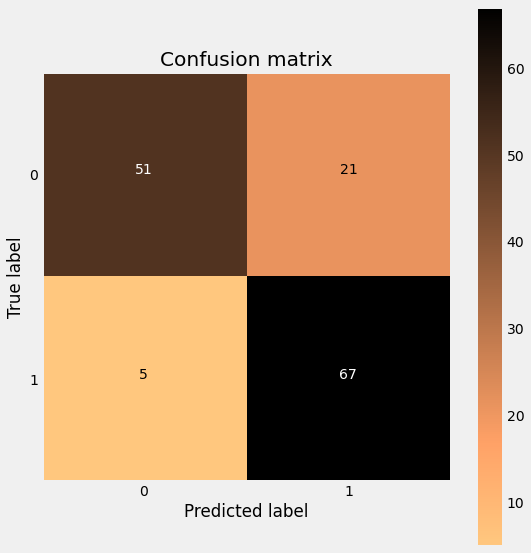

              precision    recall  f1-score   support

           0       0.91      0.71      0.80        72
           1       0.76      0.93      0.84        72

    accuracy                           0.82       144
   macro avg       0.84      0.82      0.82       144
weighted avg       0.84      0.82      0.82       144



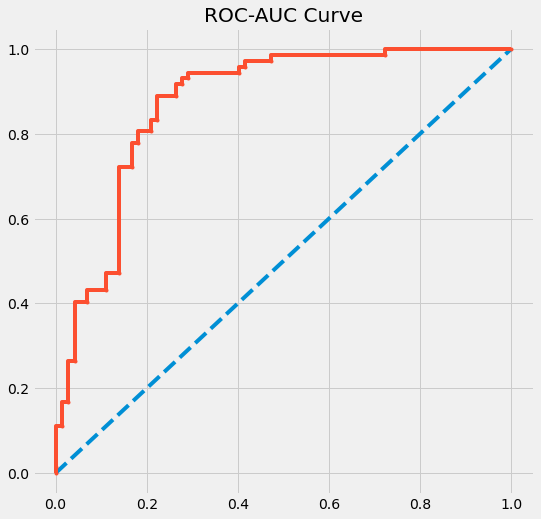

In [55]:
plt.figure(figsize = (8,8))
cnf_matrix=metrics.confusion_matrix(ytest,(np.mean(np.column_stack(final_test_predictions_vclf), axis=1)).round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(ytest, (np.mean(np.column_stack(final_test_predictions_vclf), axis=1)))
# plot no skill
plt.figure(figsize = (8,8))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC-AUC Curve')

print(metrics.classification_report(ytest,(np.mean(np.column_stack(final_test_predictions_vclf), axis=1)).round()))

## Conclusion:
- We started with **hypertuned KNN which had 4 False Positives and 39 False Negatives** and our aim was to improve this.
- We chose different models (Random Forest, Extra Tree Classifier, XGBoost, Multi-Layer Perceptron) and used Voting classifier with soft voting on top of these.
- Our **Final model has 5 False Positives and 20 False Negatives**, which is an significant improvement. 
